# LifeSnaps EDA
Exploració de dades del dataset LifeSnaps

#### Import de llibreries i warnings

In [914]:
# Exploració de dades
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import combinations

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [915]:
import warnings
warnings.filterwarnings('ignore')

## Comprensió del Dataset

El dataset LifeSnaps captura dades multimodals recollides durant 4 mesos per 71 participants. Aquestes dades provenen del wearable, autoinformes (EMAs) i qüestionaris, i estan orientades a comprendre la relació entre hàbits de vida, salut física i mental.

Les dades venen del dispositiu Fitbit Sense, un dispositiu molt similar al Fitbit Inspire 3 (el disponible) però amb algunes funcions adicionals. Que s'hauràn de tenir en compte alhora de realitzar l'anàlisi exploratori de dades.


### Dimensions i estructura

Tal i com es veurà a continuació s'observa un dataset de 63 columnes i 7410 files, algunes d'elles sense contingut, s'hauran de tractar amb cura les dades i fer una bona neteja per obtenir els millor resultats possibles.

Es un dataset amb freqüencia de mostreig diària, es a dir les dades s'han recullit de forma diària. El LifeSnaps també te un dataset de horari, però crec que resulta més interessant el recull de dades diaries per les prediccions posteriors que es poden fer.

In [916]:
df = pd.read_csv('../../../03. Datasets/Lifesnaps Fitbit/csv_rais_anonymized/daily_fitbit_sema_df_unprocessed.csv')
pd.set_option('display.max_columns', None)

display(df.head())
display(df.tail())
df.info()

Unnamed: 0                        id        date  nightly_temperature  \
0           0  621e2e8e67b776a24055b564  2021-05-24            34.137687   
1           1  621e2e8e67b776a24055b564  2021-05-25            33.794544   
2           2  621e2e8e67b776a24055b564  2021-05-26            34.611011   
3           3  621e2e8e67b776a24055b564  2021-05-27            34.408304   
4           4  621e2e8e67b776a24055b564  2021-05-28            34.178922   

   nremhr    rmssd  spo2  full_sleep_breathing_rate  stress_score  \
0  57.432   89.603   NaN                       14.8          78.0   
1  57.681   94.303   NaN                       15.8          80.0   
2  57.481  119.212   NaN                       14.6          84.0   
3  57.493  111.709   NaN                       14.8          82.0   
4  56.750  103.034   NaN                       15.2          81.0   

   sleep_points_percentage  exertion_points_percentage  \
0                 0.833333                       0.675   
1                 0.833333                       0.725   
2                 0.966667                       0.725   
3                 0.933333                       0.725   
4                 0.866667                       0.725   

   responsiveness_points_percentage  daily_temperature_variation  \
0                          0.866667                    -1.788325   
1                          0.866667                    -2.462709   
2                          0.866667                    -2.385801   
3                          0.833333                    -2.124199   
4                          0.866667                    -2.396873   

               badgeType  calories  filteredDemographicVO2Max  distance  \
0                    NaN   2351.59                   62.79210    6517.5   
1                    NaN   2332.08                   62.67912    7178.6   
2                    NaN   2262.30                   62.57307    6090.9   
3  ['LIFETIME_DISTANCE']   2325.10                   62.47493    6653.1   
4                    NaN   2586.76                   62.41166    9557.9   

  activityType        bpm  lightly_active_minutes  moderately_active_minutes  \
0     ['Walk']  71.701565                   149.0                       24.0   
1     ['Walk']  70.579300                   132.0                       25.0   
2     ['Walk']  71.842573                   112.0                       27.0   
3     ['Walk']  71.725477                   133.0                       21.0   
4     ['Walk']  74.401028                   136.0                       42.0   

   very_active_minutes  sedentary_minutes mindfulness_session  scl_avg  \
0                 33.0              713.0               False      NaN   
1                 31.0              704.0               False      NaN   
2                 31.0              710.0               False      NaN   
3                 37.0              622.0               False      NaN   
4                 54.0              647.0               False      NaN   

   resting_hr  sleep_duration  minutesToFallAsleep  minutesAsleep  \
0   62.073070      31260000.0                  0.0          445.0   
1   62.121476      32880000.0                  0.0          460.0   
2   62.263999      33600000.0                  0.0          493.0   
3   62.368900      37620000.0                  0.0          540.0   
4   61.965409      33660000.0                  0.0          493.0   

   minutesAwake  minutesAfterWakeup  sleep_efficiency  sleep_deep_ratio  \
0          76.0                 0.0              93.0          1.243243   
1          88.0                 0.0              94.0          1.466667   
2          67.0                 0.0              96.0          1.116883   
3          87.0                 0.0              93.0          1.128205   
4          68.0                 0.0              94.0          0.910256   

   sleep_wake_ratio  sleep_light_ratio  sleep_rem_ratio    steps  \
0          0.987013           0.921642         1.341772   8833

Unnamed: 0                        id        date  nightly_temperature  \
7405        7405  621e362467b776a2404ad513  2021-05-18                  NaN   
7406        7406  621e36f967b776a240e5e7c9  2021-05-20                  NaN   
7407        7407  621e362467b776a2404ad513  2021-05-23                  NaN   
7408        7408  621e339967b776a240e502de  2021-11-19                  NaN   
7409        7409  621e339967b776a240e502de  2021-11-20                  NaN   

      nremhr  rmssd  spo2  full_sleep_breathing_rate  stress_score  \
7405     NaN    NaN   NaN                        NaN           NaN   
7406     NaN    NaN   NaN                        NaN           NaN   
7407     NaN    NaN   NaN                        NaN           NaN   
7408     NaN    NaN   NaN                        NaN           NaN   
7409     NaN    NaN   NaN                        NaN           NaN   

      sleep_points_percentage  exertion_points_percentage  \
7405                      NaN                         NaN   
7406                      NaN                         NaN   
7407                      NaN                         NaN   
7408                      NaN                         NaN   
7409                      NaN                         NaN   

      responsiveness_points_percentage  daily_temperature_variation badgeType  \
7405                               NaN                          NaN       NaN   
7406                               NaN                          NaN       NaN   
7407                               NaN                          NaN       NaN   
7408                               NaN                          NaN       NaN   
7409                               NaN                          NaN       NaN   

      calories  filteredDemographicVO2Max  distance activityType  bpm  \
7405       NaN                        NaN       NaN          NaN  NaN   
7406       NaN                        NaN       NaN          NaN  NaN   
7407       NaN                        NaN       NaN          NaN  NaN   
7408       NaN                        NaN       NaN          NaN  NaN   
7409       NaN                        NaN       NaN          NaN  NaN   

      lightly_active_minutes  moderately_active_minutes  very_active_minutes  \
7405                     NaN                        NaN                  NaN   
7406                     NaN                        NaN                  NaN   
7407                     NaN                        NaN                  NaN   
7408                     NaN                        NaN                  NaN   
7409                     NaN                        NaN                  NaN   

      sedentary_minutes mindfulness_session  scl_avg  resting_hr  \
7405                NaN                 NaN      NaN         NaN   
7406                NaN                 NaN      NaN         NaN   
7407                NaN                 NaN      NaN         NaN   
7408                NaN                 NaN      NaN         NaN   
7409                NaN                 NaN      NaN         NaN   

      sleep_duration  minutesToFallAsleep  minutesAsleep  minutesAwake  \
7405             NaN                  NaN            NaN           NaN   
7406             NaN                  NaN            NaN           NaN   
7407             NaN                  NaN            NaN           NaN   
7408             NaN                  NaN            NaN           NaN   
7409             NaN                  NaN            NaN           NaN   

      minutesAfterWakeup  sleep_efficiency  sleep_deep_ratio  \
7405                 NaN               NaN               NaN   
7406                 NaN               NaN               NaN   
7407                 NaN               NaN               NaN   
7408                 NaN               NaN               NaN   
7409                 NaN               NaN               NaN   

      sleep_wake_ratio  sleep_light_ratio  sleep_rem_ratio  steps  \
7405               NaN      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        7410 non-null   int64  
 1   id                                7410 non-null   object 
 2   date                              7410 non-null   object 
 3   nightly_temperature               3359 non-null   float64
 4   nremhr                            2475 non-null   float64
 5   rmssd                             2475 non-null   float64
 6   spo2                              1270 non-null   float64
 7   full_sleep_breathing_rate         2495 non-null   float64
 8   stress_score                      1876 non-null   float64
 9   sleep_points_percentage           1876 non-null   float64
 10  exertion_points_percentage        1876 non-null   float64
 11  responsiveness_points_percentage  1876 non-null   float64
 12  daily_

In [917]:
# Verifiquem que hi ha 71 participants
print(f'Participants: {df["id"].nunique()}')

# Eliminel l'id ja que no ens aporta informació
# Eliminem la columna Unnamed: 0 que és un índex
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['id'], inplace=True)


Participants: 71


In [918]:
print(f'Files: {df.shape[0]}')
print(f'Columnes: {df.shape[1]}')

Files: 7410
Columnes: 61


In [919]:
# Comprovem els canvis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 61 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              7410 non-null   object 
 1   nightly_temperature               3359 non-null   float64
 2   nremhr                            2475 non-null   float64
 3   rmssd                             2475 non-null   float64
 4   spo2                              1270 non-null   float64
 5   full_sleep_breathing_rate         2495 non-null   float64
 6   stress_score                      1876 non-null   float64
 7   sleep_points_percentage           1876 non-null   float64
 8   exertion_points_percentage        1876 non-null   float64
 9   responsiveness_points_percentage  1876 non-null   float64
 10  daily_temperature_variation       3304 non-null   float64
 11  badgeType                         515 non-null    object 
 12  calori

### Nomenclatura del Dataset

**1. Variables temporals i identificadores**
-   `d`, `date`: Data específica (any-mes-dia) a la qual corresponen les dades registrades.
-   `activityType`: Categoria de l'activitat física o estat registrat (ex: "Caminar", "Córrer", "Dormir"). Permet filtrar o agrupar les dades per tipus d'activitat (Realment no se si en un anàlisis diàri, es correcte aquesta definició, no es pot definir un tipo d'activitat a tot un dia).

**2. Dades fisiològiques (sensor Fitbit)**
-   `bpm`: Batecs per minut (freqüència cardíaca) mesurats pel sensor en un moment donat o com a mitjana d'un període curt.
-   `resting_hr`: Freqüència cardíaca mitjana mesurada durant períodes de repòs o son, indicador de la salut cardiovascular basal.
-   `rmssd`: Arrel quadrada de la mitjana de les diferències al quadrat entre intervals de batecs consecutius. És una mesura clau de la **Variabilitat de la Freqüència Cardíaca (VFC)**, relacionada amb l'estrès i la recuperació del sistema nerviós autònom.
-   `spo2`: Percentatge d'oxigen a la sang (saturació d'oxigen), mesurat durant el son. Valors normals solen ser >90-95%.
-   `scl_avg`: Mitjana de la conductància de la pell (resposta electrodèrmica). **Nota:** Aquest sensor **no està disponible** al Fitbit Inspire 3. Si apareix al dataset, podria ser un error o provenir d'un altre dispositiu.
-   `nightly_temperature`, `daily_temperature_variation`: Variacions de la temperatura de la pell registrades pel sensor durant la nit i comparades amb la línia base personal. No mesura la temperatura corporal central.

**3. Dades de son**
-   `sleep_duration`: Temps total que l'usuari ha passat dormint durant un període de son registrat (en milisegons).
-   `minutesToFallAsleep`, `minutesAsleep`, `minutesAwake`, `minutesAfterWakeup`: Desglossament del temps passat al llit: minuts necessaris per adormir-se, minuts efectivament dormint, minuts despert durant la nit, i minuts despert al llit abans d'aixecar-se definitivament.
-   `sleep_efficiency`: Percentatge del temps total passat al llit que realment s'ha estat dormint (`minutesAsleep` / temps total al llit * 100). Indicador de la qualitat del descans.
-   `sleep_deep_ratio`, `sleep_light_ratio`, `sleep_rem_ratio`, `sleep_wake_ratio`: Proporció (%) del temps total de son passat en cada fase específica (son profund, lleuger, REM) i despert durant el període de son.
-   `full_sleep_breathing_rate`: Mitjana de respiracions per minut durant tot el període de son.
-   `nremhr`: Freqüència cardíaca mitjana durant les fases de son No-REM (lleuger i profund).
-   `sleep_points_percentage`: Puntuació global de la qualitat del son (de 0 a 100) calculada per Fitbit, basada en la durada, les fases i la recuperació.

**4. Dades d’activitat física i exercici**
-   `steps`: Nombre total de passos registrats durant el dia.
-   `calories`: Estimació de les calories totals cremades durant el dia.
-   `distance`: Estimació de la distància recorreguda durant el dia (basada en passos).
-   `very_active_minutes`, `moderately_active_minutes`, `lightly_active_minutes`, `sedentary_minutes`: Classificació del temps diari (en minuts) segons la intensitat de l'activitat física, normalment està basada en la freqüència cardíaca i el moviment.
-   `mindfulness_session`: Indica si s'ha realitzat i registrat una sessió de mindfulness o respiració guiada (ex: 0 o 1, o el nombre de sessions).
-   `minutes_in_default_zone_*`: Temps (en minuts) passat dins de les zones de freqüència cardíaca predefinides per Fitbit durant l'exercici ("Fat Burn", "Cardio", "Peak").

**5. Indicadors agregats i puntuacions Fitbit**
-   `stress_score`: Puntuació diària (0-100) que estima el nivell d'estrès fisiològic, calculada per Fitbit a partir de la VFC (RMSSD), la freqüència cardíaca en repòs, el son i l'activitat.
-   `exertion_points_percentage`, `responsiveness_points_percentage`: Components de la puntuació de "Recuperació Diària" (Daily Readiness Score) de Fitbit. `Exertion` reflecteix l'impacte de l'activitat recent i `Responsiveness` la sensibilitat fisiològica (basada en VFC i FC en repòs).
-   `badgeType`: Identificador del tipus d'insígnia o "badge" virtual aconseguit per l'usuari (ex: "10.000 passos diaris", "Objectiu de son complert").

**6. Dades demogràfiques i antropomètriques**
-   `age`: Edat de l'usuari en anys.
-   `gender`: Gènere registrat per l'usuari (ex: "Masculí", "Femení", "Altre", o codificat).
-   `bmi`: Índex de Massa Corporal, calculat a partir del pes i l'alçada introduïts per l'usuari (pes / alçada²).
-   `filteredDemographicVO2Max`: Estimació del consum màxim d'oxigen (VO2 Max), un indicador de la capacitat aeròbica i la salut cardiovascular. Fitbit l'estima basant-se en dades demogràfiques, la freqüència cardíaca en repòs i dades d'exercici (és podria descartar ja que el Fitbit Inspire 3 no disposa de un indicador de V02Max).

**7. Objectius i hàbits**
-   `step_goal`, `min_goal`, `max_goal`: Fites numèriques diàries establertes per l'usuari per a paràmetres com passos, minuts actius, etc. `min_goal` i `max_goal` podrien referir-se a rangs acceptables per a alguna mètrica.
-   `step_goal_label`: Etiqueta qualitativa que descriu l'objectiu de passos (ex: "10000-14999").

**8. Estats d’ànim i emocions (EMAs - Ecological Momentary Assessments)**
-   `ALERT`, `HAPPY`, `NEUTRAL`, `RESTED/RELAXED`, `SAD`, `TENSE/ANXIOUS`, `TIRED`: Variables que representen l'estat d'ànim o emocional auto-reportat per l'usuari en moments específics, per les equestes EMA. Binàries (0/1).

**9. Context situacional o ambiental**
-   `ENTERTAINMENT`, `GYM`, `HOME`, `HOME_OFFICE`, `OTHER`, `OUTDOORS`, `TRANSIT`, `WORK/SCHOOL`: Etiquetes que descriuen l'entorn o la situació en què es troba l'usuari. Pot ser útil per contextualitzar les dades fisiològiques o d'activitat.

## Neteja de dades inicial

#### Basic Feature Selection & Feature Engineering

In [920]:
# Traiem les columnes que no ens aporten valor, segons disponibilitat de dades i la importancia que li donem a cada columna segons el target que volem predir.
# Fitbit inspire 3 es el dispositiu que tinc disponible i s'ha de adaptar el dataset a aquest dispositiu.

# Es una primera neteja per tal de analitzar millor les nostres dades i poder fer una bona exploració de les dades.

df=df.drop(columns=['mindfulness_session', 'step_goal', 'step_goal_label', 'ENTERTAINMENT', 'GYM', 'HOME', 'HOME_OFFICE', 'OTHER', 'OUTDOORS', 'TRANSIT', 'WORK/SCHOOL', 'activityType', 'badgeType', 'filteredDemographicVO2Max', 'exertion_points_percentage', 'responsiveness_points_percentage', 'distance', 'scl_avg', 'sleep_duration', 'min_goal', 'max_goal'])


In [921]:
## Corregim les dades de bmi a categories millorades i ben classificades
df['bmi'].value_counts(dropna=False)

bmi
24.0    915
20.0    881
21.0    719
22.0    674
<19     663
NaN     614
23.0    505
>=30    476
19.0    405
26.0    348
29.0    302
>=25    294
27.0    251
28.0    183
25.0    180
Name: count, dtype: int64

Tal hi com havia observat l'etiqueta >=25 no te sentit ja que ja hi ha valors entre 25 i 29 als quals s'hauran de imputar les dades.

In [922]:
# Fem una correcció de la variabe del bmi
limits = (0, 18.5, 24.9, 29.9, 34.9) # limits segons les dades que tenim i el bmi
categories_BMI = [
    'Infrapes',
    'Normal',
    'Sobrepes',
    'Obes'
]

# Caputrem les dades amb la etiqueta >=25
mask_25 = df['bmi'] == '>=25' # Com que els valors >=25 es troben igualment a la categoria de Sobrepes, els imputarem com a la mitjana.

# Assignar a 18.4 els valors '<19' perquè caiguin dins 'Infrapes'
df.loc[df['bmi'] == '<19', 'bmi'] = 18.4

# Assignar a 30 els valors '>=30'
df.loc[df['bmi'] == '>=30', 'bmi'] = 30


# Convertim a float
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

mask_25_29 = (df['bmi'] >= 25) & (df['bmi'] <= 29)
mean_bmi_25_29 = df.loc[mask_25_29, 'bmi'].mean() 
print(f'Mitjana BMI 25-29: {mean_bmi_25_29}')

df.loc[mask_25, 'bmi'] = mean_bmi_25_29


df['bmi_tipo'] = pd.cut(
    df['bmi'],
    bins=limits,
    labels=categories_BMI,
    right=False
)
print(df['bmi'].value_counts(dropna=False))
print(df['bmi_tipo'].value_counts(dropna=False))
display(df.head())

Mitjana BMI 25-29: 27.0625
bmi
24.0000    915
20.0000    881
21.0000    719
22.0000    674
18.4000    663
NaN        614
23.0000    505
30.0000    476
19.0000    405
26.0000    348
29.0000    302
27.0625    294
27.0000    251
28.0000    183
25.0000    180
Name: count, dtype: int64
bmi_tipo
Normal      4099
Sobrepes    1558
Infrapes     663
NaN          614
Obes         476
Name: count, dtype: int64


date  nightly_temperature  nremhr    rmssd  spo2  \
0  2021-05-24            34.137687  57.432   89.603   NaN   
1  2021-05-25            33.794544  57.681   94.303   NaN   
2  2021-05-26            34.611011  57.481  119.212   NaN   
3  2021-05-27            34.408304  57.493  111.709   NaN   
4  2021-05-28            34.178922  56.750  103.034   NaN   

   full_sleep_breathing_rate  stress_score  sleep_points_percentage  \
0                       14.8          78.0                 0.833333   
1                       15.8          80.0                 0.833333   
2                       14.6          84.0                 0.966667   
3                       14.8          82.0                 0.933333   
4                       15.2          81.0                 0.866667   

   daily_temperature_variation  calories        bpm  lightly_active_minutes  \
0                    -1.788325   2351.59  71.701565                   149.0   
1                    -2.462709   2332.08  70.579300                   132.0   
2                    -2.385801   2262.30  71.842573                   112.0   
3                    -2.124199   2325.10  71.725477                   133.0   
4                    -2.396873   2586.76  74.401028                   136.0   

   moderately_active_minutes  very_active_minutes  sedentary_minutes  \
0                       24.0                 33.0              713.0   
1                       25.0                 31.0              704.0   
2                       27.0                 31.0              710.0   
3                       21.0                 37.0              622.0   
4                       42.0                 54.0              647.0   

   resting_hr  minutesToFallAsleep  minutesAsleep  minutesAwake  \
0   62.073070                  0.0          445.0          76.0   
1   62.121476                  0.0          460.0          88.0   
2   62.263999                  0.0          493.0          67.0   
3   62.368900                  0.0          540.0          87.0   
4   61.965409                  0.0          493.0          68.0   

   minutesAfterWakeup  sleep_efficiency  sleep_deep_ratio  sleep_wake_ratio  \
0                 0.0              93.0          1.243243          0.987013   
1                 0.0              94.0          1.466667          1.142857   
2                 0.0              96.0          1.116883          0.858974   
3                 0.0              93.0          1.128205          1.129870   
4                 0.0              94.0          0.910256          0.871795   

   sleep_light_ratio  sleep_rem_ratio    steps  minutes_in_default_zone_1  \
0           0.921642         1.341772   8833.0                       83.0   
1           0.947566         1.197531   9727.0                       56.0   
2           1.015038         1.670732   8253.0                       85.0   
3           1.191729         1.588235   9015.0                       90.0   
4           1.211896         1.090909  12949.0                      146.0   

   minutes_below_default_zone_1  minutes_in_default_zone_2  \
0                        1349.0                        0.0   
1                        1374.0                        4.0   
2                        1350.0                        0.0   
3                        1282.0                        0.0   
4                        1274.0                        4.0   

   minutes_in_default_zone_3  age gender   bmi  ALERT  HAPPY  NEUTRAL  \
0                        0.0  <30   MALE  18.4    NaN    NaN      NaN   
1                        0.0  <30   MALE  18.4    0.0    1.0      0.0   
2                        0.0  <30   MALE  18.4    0.0    1.0      0.0   
3                        0.0  <30   MALE  18.4    0.0    1.0      0.0   
4                        0.0  <30   MALE  18.4    0.0    1.0      0.0   

   RESTED/RELAXED  SAD  TENSE/ANXIOUS  TIRED  bmi_tipo  
0             NaN  NaN            NaN    NaN  Infrapes  
1             0.0  0.0            0.0   

#### Dades nules del dataset


In [923]:
# Percentatge de valors nuls
print('Percentatge de valors nuls:', '\n')
print(df.isnull().sum()/df.shape[0]*100)

Percentatge de valors nuls: 

date                             0.000000
nightly_temperature             54.669366
nremhr                          66.599190
rmssd                           66.599190
spo2                            82.860999
full_sleep_breathing_rate       66.329285
stress_score                    74.682861
sleep_points_percentage         74.682861
daily_temperature_variation     55.411606
calories                        10.121457
bpm                             35.168691
lightly_active_minutes           4.412955
moderately_active_minutes        4.412955
very_active_minutes              4.412955
sedentary_minutes                4.412955
resting_hr                      40.323887
minutesToFallAsleep             52.078273
minutesAsleep                   52.078273
minutesAwake                    52.078273
minutesAfterWakeup              52.078273
sleep_efficiency                52.078273
sleep_deep_ratio                55.546559
sleep_wake_ratio                55.546559
slee

Com podem observar hi ha una gran quantitat de dades nules dins del dataset, posetriorment ens haurem d'assegurar de tractarles de forma correcte.

#### Columnes numèriques i categòriques

In [924]:
# Separar les columnes numèriques i categòriques així facilitem la seva manipulació

numeric_col=df.select_dtypes(include=['int64', 'float64']).columns
categoric_col=df.select_dtypes(include=['category', 'object']).columns

print(f'Columnes numèriques:\n {numeric_col}')
print('--'*50)
print(f'Columnes categòriques:\n {categoric_col}')

Columnes numèriques:
 Index(['nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'daily_temperature_variation', 'calories', 'bpm',
       'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'resting_hr',
       'minutesToFallAsleep', 'minutesAsleep', 'minutesAwake',
       'minutesAfterWakeup', 'sleep_efficiency', 'sleep_deep_ratio',
       'sleep_wake_ratio', 'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'bmi',
       'ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS',
       'TIRED'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Columnes categòriques:
 Index(['date', 'age', 'gender', 'bmi_tipo'], dtype='object')


In [925]:
# Generem diferents datasets per els diferents tipus de dades i corregim es variables binaries que son categòriques

df_numeric = df[numeric_col]
df_numeric = df_numeric.drop(columns=['ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS', 'TIRED']) #ja que realment son catagoriques pero amb valors binaris

df_categoric = df[categoric_col]
# Passem aquestes columnes a categòriques
target_col = ['ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS', 'TIRED']
df[target_col] = df[target_col].astype('category')

# Les afegim a df_categoric
df_categoric = pd.concat([df_categoric, df[target_col]], axis=1)

# Tornem a definr les colunes numèriques i categòriques
numeric_col = df_numeric.columns
categoric_col = df_categoric.columns

print(f'Columnes numèriques:\n {numeric_col}')
print('--'*50)
print(f'Columnes categòriques:\n {categoric_col}')



Columnes numèriques:
 Index(['nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'daily_temperature_variation', 'calories', 'bpm',
       'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'resting_hr',
       'minutesToFallAsleep', 'minutesAsleep', 'minutesAwake',
       'minutesAfterWakeup', 'sleep_efficiency', 'sleep_deep_ratio',
       'sleep_wake_ratio', 'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'bmi'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Columnes categòriques:
 Index(['date', 'age', 'gender', 'bmi_tipo', 'ALERT', 'HAPPY', 'NEUTRAL',
       'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS', 'TIRED'],
      dtype='object')


## Anàlisi Univariada (Anàlisi de Variables Individuals)

### Anàlisis de Variables Numèriques

#### Estadistica Descriptiva

In [926]:
df_numeric.describe()

nightly_temperature       nremhr        rmssd         spo2  \
count          3359.000000  2475.000000  2475.000000  1270.000000   
mean             33.771650    62.714134    40.021232    95.893228   
std               0.905129    11.051482    21.305442     1.114339   
min              25.518333     0.000000     0.000000    89.400000   
25%              33.305913    57.434500    25.442000    95.200000   
50%              33.887166    63.146000    34.072000    95.900000   
75%              34.342720    69.192000    48.723000    96.700000   
max              36.684793    92.547000   122.089000   100.000000   

       full_sleep_breathing_rate  stress_score  sleep_points_percentage  \
count                2495.000000   1876.000000              1876.000000   
mean                   14.836954     64.181237                 0.653998   
std                     3.774846     28.470995                 0.303243   
min                     0.000000      0.000000                 0.000000   
25%                    13.200000     67.000000                 0.633333   
50%                    15.000000     75.000000                 0.733333   
75%                    17.000000     80.000000                 0.833333   
max                    29.800000     94.000000                 1.000000   

       daily_temperature_variation     calories          bpm  \
count                  3304.000000  6660.000000  4804.000000   
mean                     -1.471843  2182.955429    80.250496   
std                       0.967792   704.189313     9.503785   
min                      -5.688866     0.690000    43.500000   
25%                      -2.182988  1669.470000    74.692035   
50%                      -1.415089  2073.600000    79.790362   
75%                      -0.722098  2579.765000    85.165654   
max                       3.393617  8387.030000   153.995380   

       lightly_active_minutes  moderately_active_minutes  very_active_minutes  \
count             7083.000000                7083.000000          7083.000000   
mean               131.825921                  14.143724            14.509389   
std                121.081398                  23.840320            27.489127   
min                  0.000000                   0.000000             0.000000   
25%                  0.000000                   0.000000             0.000000   
50%                133.000000                   0.000000             0.000000   
75%                225.000000                  21.000000            19.000000   
max                585.000000                 289.000000           409.000000   

       sedentary_minutes   resting_hr  minutesToFallAsleep  minutesAsleep  \
count        7083.000000  4422.000000          3551.000000    3551.000000   
mean         1041.721305    66.268735             0.116305     393.071529   
std           354.677097     7.234891             2.515471      98.382524   
min             0.000000    44.122845             0.000000       0.000000   
25%           713.000000    61.637034             0.000000     343.000000   
50%          1041.000000    66.504308             0.000000     401.000000   
75%          1440.000000    71.432724             0.000000     454.000000   
max          1440.000000    86.000000           103.000000    1094.000000   

       minutesAwake  minutesAfterWakeup  sleep_efficiency  sleep_deep_ratio  \
count   3551.000000         3551.000000       3551.000000       3294.000000   
mean      56.625458            0.922275         93.776401          1.003768   
std       23.066553            3.150522          6.296757          0.325347   
min        0.000000            0.000000         34.000000          0.000000   
25%       43.000000            0.000000         93.000000          0.788529   
50%       55.000000            0.000000         95.000000          0.986013   
75%       70.000000            0.000000         97.000000          1.186259   
max      358.000000           62.000000        100.000000          4.310345 

**Errors observats:**
- nremhr: no pot tenir un mínim de 0 ja que la persona estaria morta
- rmssd: error en mínim de 0
- full_sleep_breathing_rate: error en el minim de 0
- stress_score error en el minim de 0
- sleep_points percentatge: error en el minim de 0
- calories: no pot ser que en un dia nomes s'hagin gastat 0.69 cal i m'extranya també el valor maxim de 8300 cal, em semblen massa.
- sedentary_minutes: m'extranya que el minim sigui 0, es extrany que en tot el dia no hi hagi hagut ni 1 minut de sedentarisme.
- minutesToFallAsleep: es extrany que uns al 75% sigui 0 i el max sigui tant elevat. Observar bé la columna, potser eliminar, crec que no aporta valor.
- minutesAssleep: que el minim sigui 0 no pot ser, el max son gairebe 17h que em sembla molt exagerat.
- sleep_eficiency: 34 crec que es molt baix
- sleep_deep_ratio: min de 0 es impossible
- sleep_wake_ratio: min de 0 es impossible
- sleep_light_ratio: min de 0 es impossible	
- sleep_rem_ratio: min de 0 es impossible
- steps: min de 0 es impossible
- minutes_below_default_zone_1: entenc que ha de haver un moment que estas per sota de la zona 1 sempre (pero potser nomes son dades de quan es registra una activitat)

#### Visualització de la Distribució de dades

##### Histogràmes

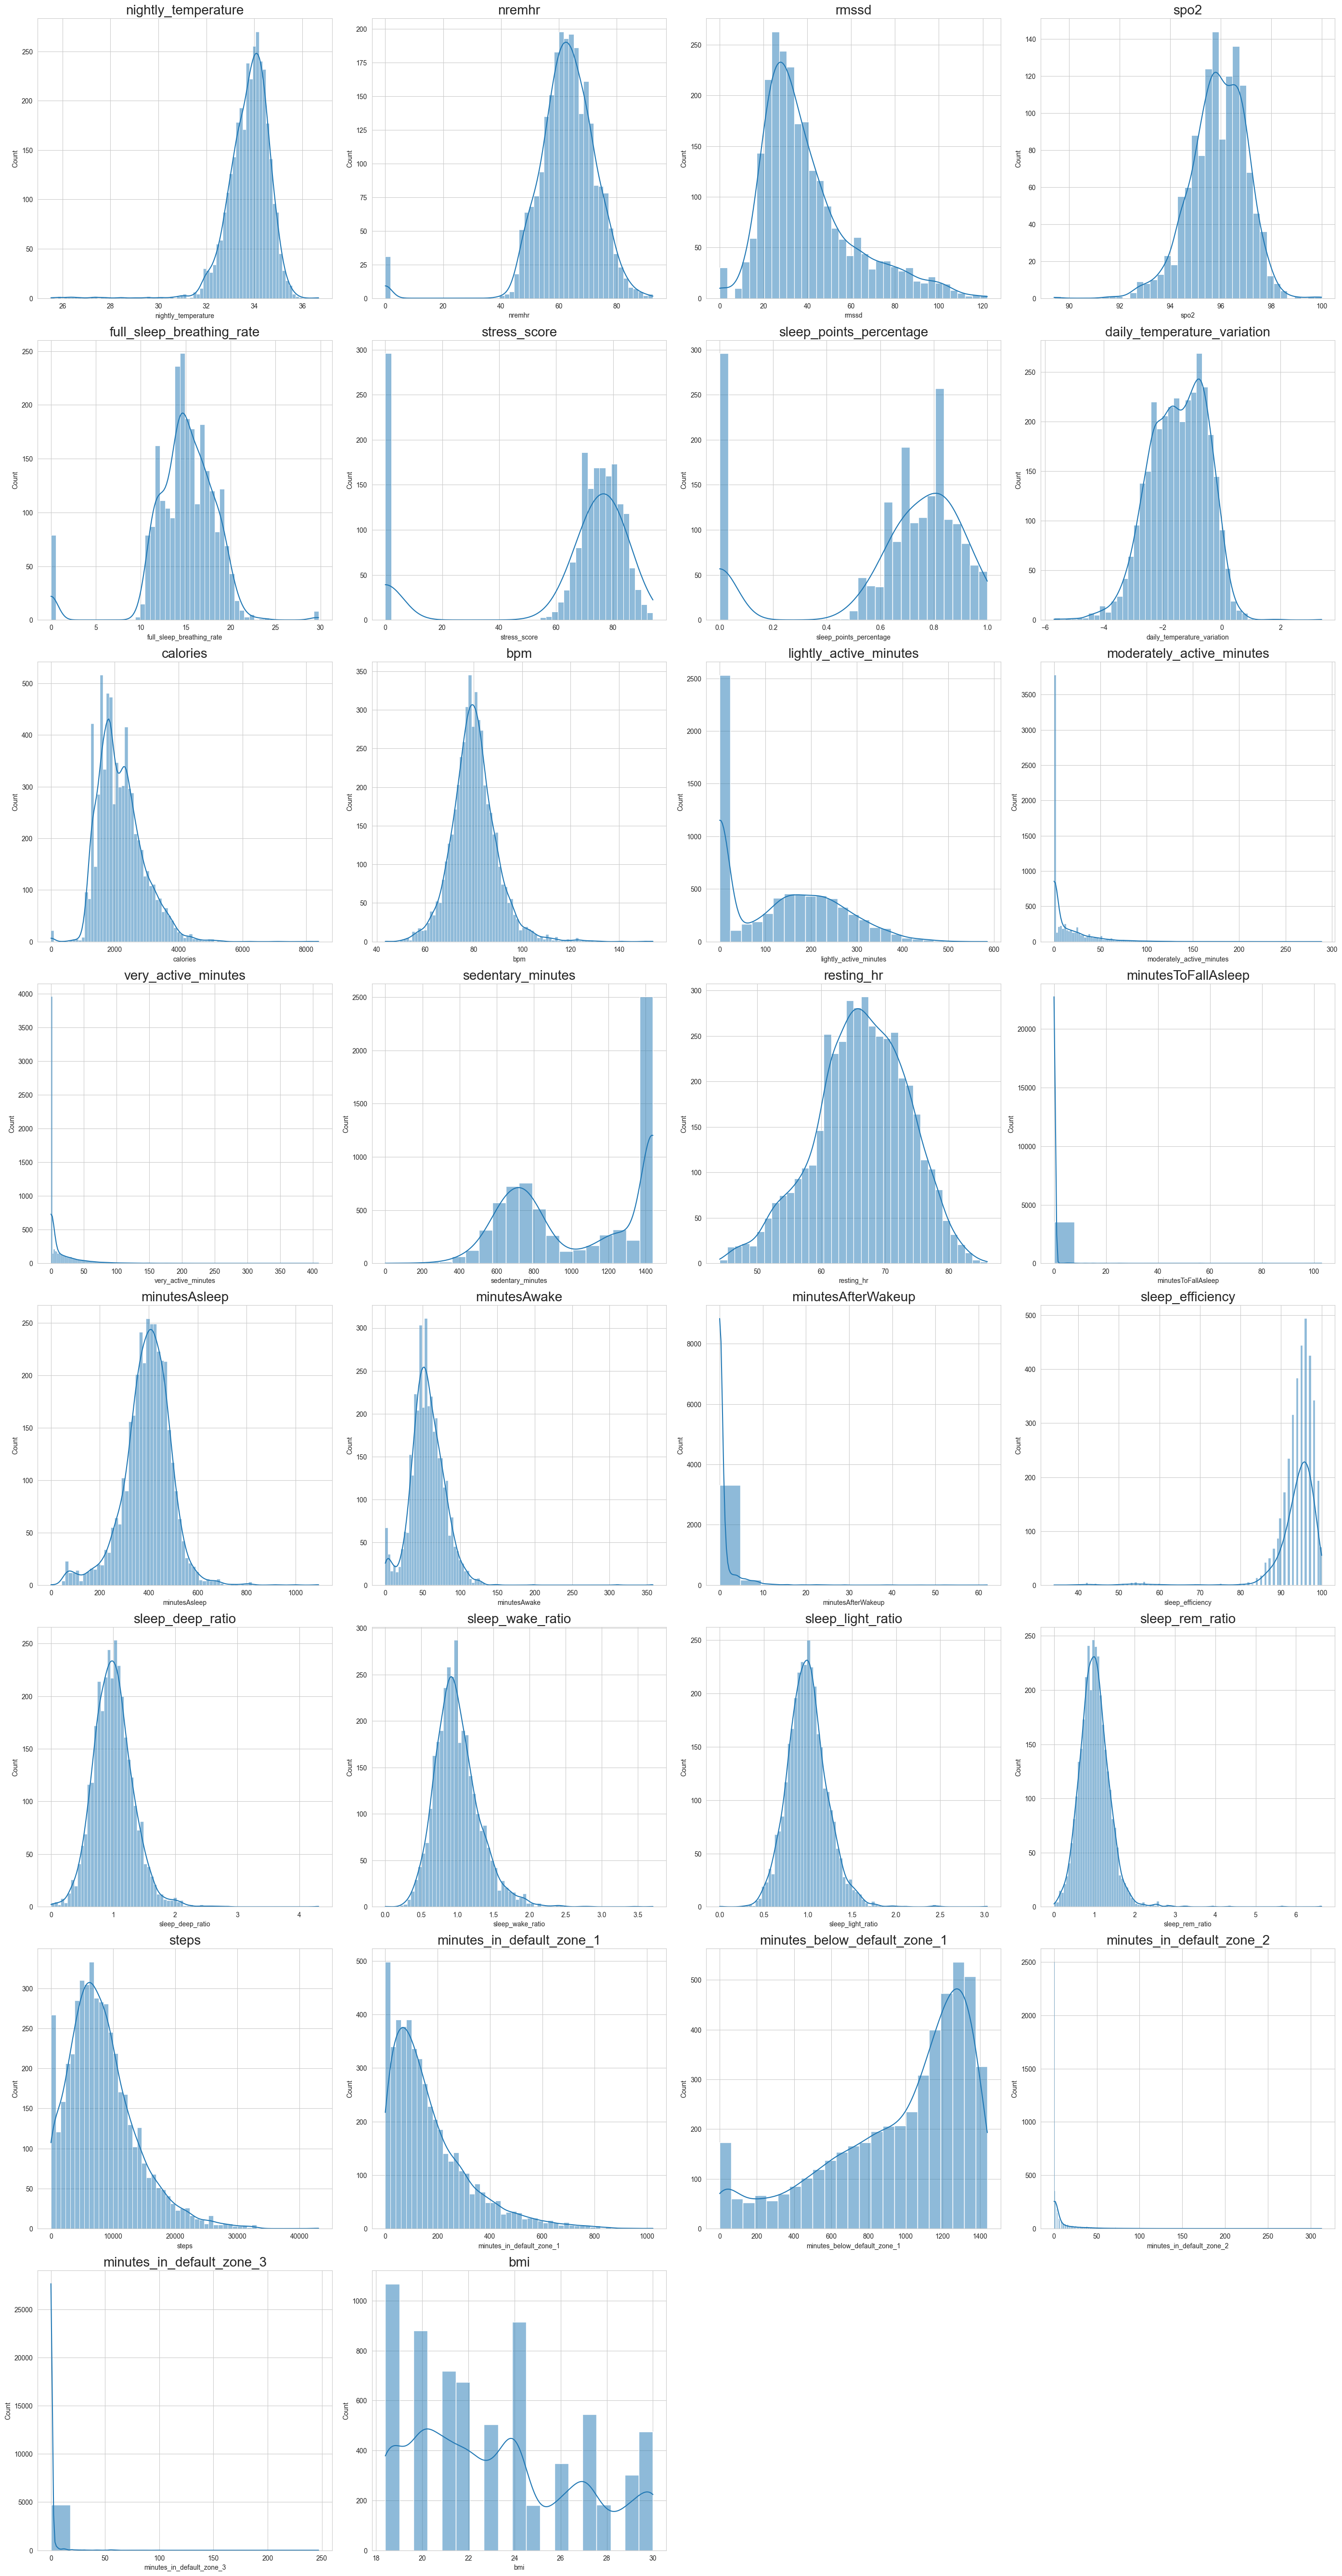

In [927]:
# Histogramas de les variables numèriques

plt.figure(figsize=(28, 100))
plotnumber = 1
for i in df_numeric.columns:
    ax = plt.subplot(15, 4, plotnumber)
    sns.histplot(df_numeric[i], kde=True, ax=ax)
    plt.title(i, size=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

# Per tal de netejar les dades s'hauran de eliminar les dades que no tenen sentit segons la columna en la que es troben
# Per exemple, si la columna de nremhr, no pot tenir valors iguals a zero ja que significaria que no hi ha ritme cardíac,
# llavors també hauran de tenir un procés de neteja de dades. Tal i com també hem vist a la descripcio de les vars numèriques.

realment com que ALERT, HAPPY, NEUTRAL, RESTED, SAD, TENSE I TIRED. Son categories categòriques i no numèriques (ja que son binaries son numèriques però tenen un component categoric important)

##### Gràfics de Densitat

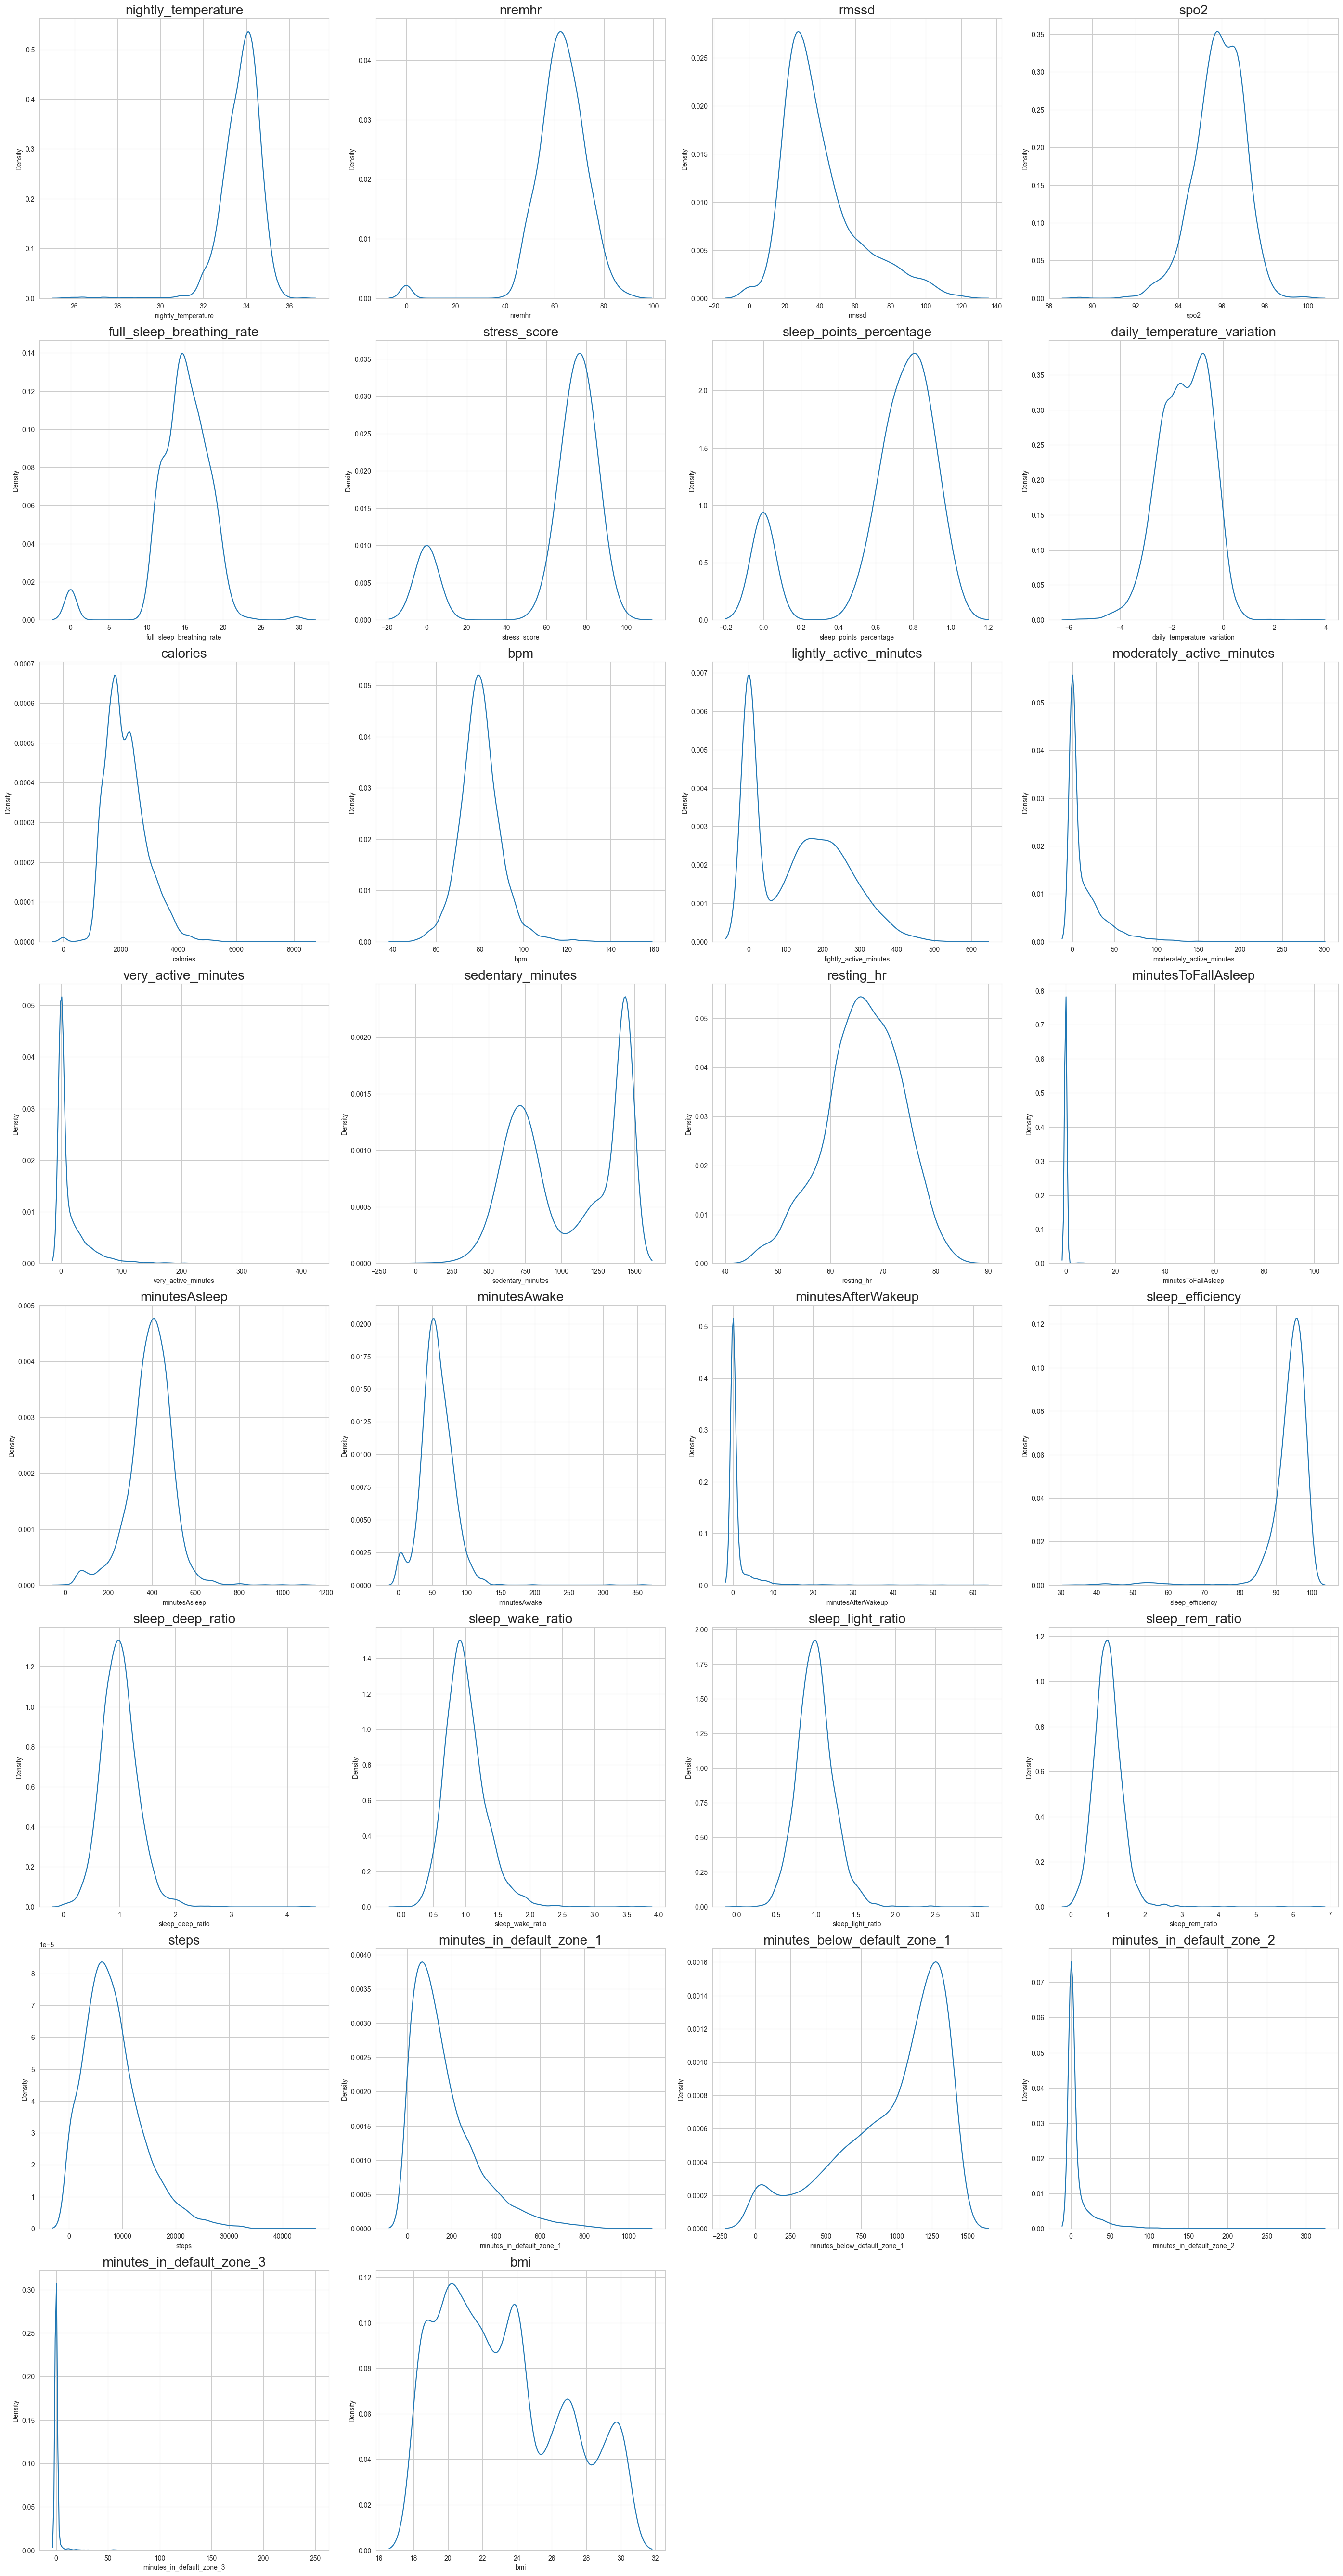

In [928]:
plt.figure(figsize=(28, 100))
plotnumber = 1
for i in df_numeric.columns:
    ax = plt.subplot(15, 4, plotnumber)
    sns.kdeplot(df_numeric[i], ax=ax)
    plt.title(i, size=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

##### Boxplots

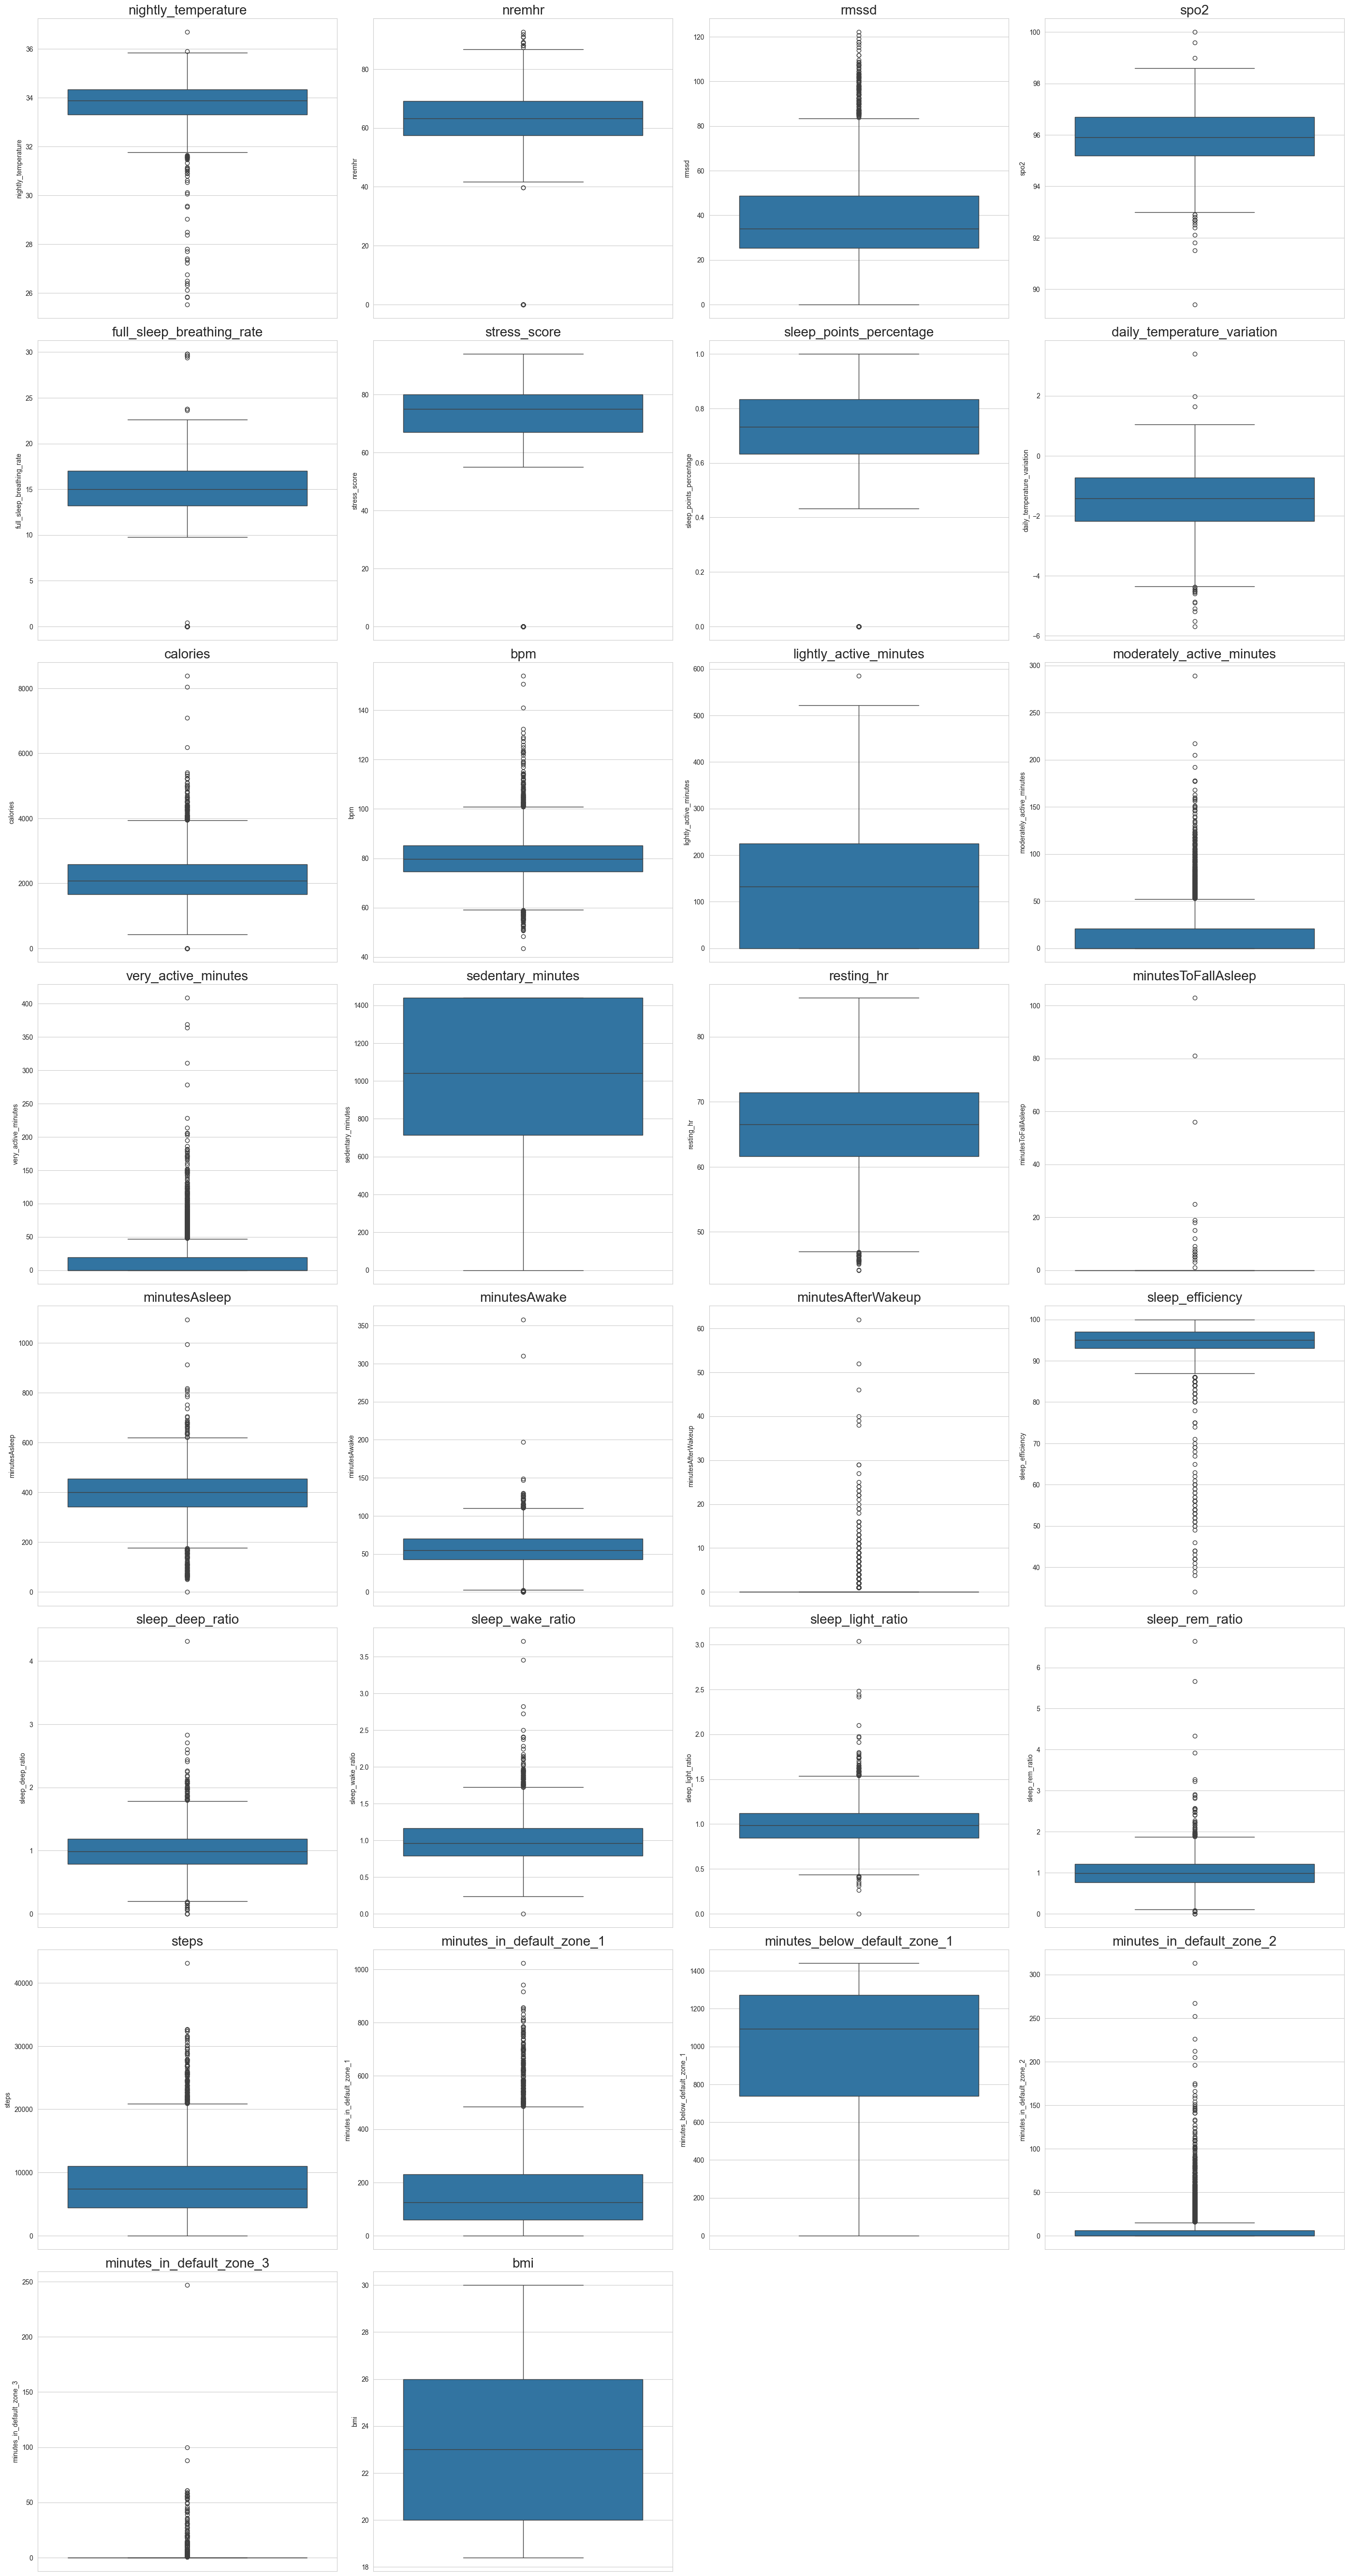

In [929]:
# Boxplots de les variables numèriques
# Per tal de veure si hi ha outliers i com es distribueixen les dades
plt.figure(figsize=(28, 100))
plotnumber = 1 
for i in df_numeric.columns:
    ax = plt.subplot(15, 4, plotnumber)
    sns.boxplot(df_numeric[i], ax=ax)
    plt.title(i, size=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

#### Anàlisi d'Asimetria i Curtosi

In [930]:
# Anàlisi d'Asimetria i Curtosi
skewness = df[numeric_col].skew()
kurtosis = df[numeric_col].kurtosis()

# Mostrem els resultats
print("Skewness per a cada variable numèrica:")
print(skewness)
print("\nKurtosis per a cada variable numèrica:")
print(kurtosis)

# També podem combinar-ho en un sol DataFrame per a millor visualització
asym_kurt_df = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})
display(asym_kurt_df)

Skewness per a cada variable numèrica:
nightly_temperature             -2.397144
nremhr                          -2.085604
rmssd                            1.182367
spo2                            -0.536868
full_sleep_breathing_rate       -1.520004
stress_score                    -1.688486
sleep_points_percentage         -1.382285
daily_temperature_variation     -0.314987
calories                         0.974655
bpm                              0.784384
lightly_active_minutes           0.405302
moderately_active_minutes        2.729434
very_active_minutes              3.675836
sedentary_minutes               -0.105969
resting_hr                      -0.288574
minutesToFallAsleep             32.384782
minutesAsleep                   -0.303806
minutesAwake                     1.138709
minutesAfterWakeup               8.115132
sleep_efficiency                -4.988525
sleep_deep_ratio                 0.812994
sleep_wake_ratio                 1.134732
sleep_light_ratio                0.71

Skewness     Kurtosis
nightly_temperature           -2.397144    15.671267
nremhr                        -2.085604    11.066356
rmssd                          1.182367     1.173865
spo2                          -0.536868     1.236506
full_sleep_breathing_rate     -1.520004     5.884836
stress_score                  -1.688486     1.166782
sleep_points_percentage       -1.382285     0.603029
daily_temperature_variation   -0.314987     0.092541
calories                       0.974655     2.817121
bpm                            0.784384     3.749525
lightly_active_minutes         0.405302    -0.900271
moderately_active_minutes      2.729434    10.967023
very_active_minutes            3.675836    24.287177
sedentary_minutes             -0.105969    -1.575527
resting_hr                    -0.288574    -0.129137
minutesToFallAsleep           32.384782  1161.939944
minutesAsleep                 -0.303806     2.842070
minutesAwake                   1.138709    12.669156
minutesAfterWakeup             8.115132   101.407087
sleep_efficiency              -4.988525    32.757365
sleep_deep_ratio               0.812994     4.495993
sleep_wake_ratio               1.134732     4.241897
sleep_light_ratio              0.717864     3.685772
sleep_rem_ratio                2.246357    22.954943
steps                          1.061376     1.746350
minutes_in_default_zone_1      1.542011     2.787478
minutes_below_default_zone_1  -0.958122    -0.014811
minutes_in_default_zone_2      5.121540    40.172915
minutes_in_default_zone_3     18.574233   578.782505
bmi                            0.456961    -0.888208


##### **Què són **Skewness** i **Kurtosis**?**

- **Skewness (Asimetria):** Mesura la simetria de la distribució d'una variable.  
  - Si **skewness = 0**, la distribució és simètrica (com una distribució normal).  
  - Si **skewness > 0**, la distribució té una cua més llarga a la dreta (asimetria positiva).  
  - Si **skewness < 0**, la distribució té una cua més llarga a l'esquerra (asimetria negativa).  

- **Kurtosis (Curtosi):** Mesura la "punxeguda" de la distribució.  
  - Si **kurtosis = 3**, la distribució és mesocúrtica (com una normal).  
  - Si **kurtosis > 3**, és leptocúrtica (amb cues més llargues i pics més alts).  
  - Si **kurtosis < 3**, és platicúrtica (amb cues més curtes i distribució més plana).  

---

**Interpretació dels resultats**

**Skewness (Asimetria):**
- **Variables amb alta asimetria positiva:**  
  - `minutesToFallAsleep (32.38)`, `minutes_in_default_zone_3 (18.57)`, `minutesAfterWakeup (8.11)`, `very_active_minutes (3.68)`, etc.  
  Aquestes variables tenen distribucions molt desplaçades cap a l'esquerra, amb valors extrems a la dreta. Això indica que la majoria dels valors són baixos, però hi ha alguns casos amb valors molt alts.

- **Variables amb alta asimetria negativa:**  
  - `nightly_temperature (-2.39)`, `nremhr (-2.08)`, `sleep_efficiency (-4.99)`.  
  Aquestes variables tenen distribucions desplaçades cap a la dreta, amb valors extrems a l'esquerra. Això pot indicar errors o valors atípics.

**Kurtosis (Curtosi):**
- **Variables amb alta curtosi:**  
  - `minutes_in_default_zone_3 (578.78)`, `minutesToFallAsleep (1161.94)`, `sleep_efficiency (32.75)`.  
  Aquestes variables tenen distribucions amb pics molt alts i cues llargues, indicant la presència de valors extrems o concentració de dades al voltant de la mitjana.

- **Variables amb baixa curtosi:**  
  - `lightly_active_minutes (-0.90)`, `sedentary_minutes (-1.57)`, `RESTED/RELAXED (-1.79)`.  
  Aquestes variables tenen distribucions més planes, amb menys concentració de dades al voltant de la mitjana.

---

**Observacions generals:**
1. **Valors extrems:** Algunes variables, com `minutesToFallAsleep` i `minutes_in_default_zone_3`, tenen valors molt extrems (alta skewness i kurtosis). Això pot indicar dades atípiques o errors que caldria revisar.
2. **Distribucions no normals:** La majoria de les variables no segueixen una distribució normal, fet que pot requerir transformacions (com logaritmes o normalització) per a algunes anàlisis.
3. **Dades a revisar:** Variables com `sleep_efficiency` i `nremhr` tenen valors negatius o extrems que no semblen realistes i podrien requerir neteja o imputació.

### Anàlisi de variables categòriques

In [931]:
print('Variables categoriques:\n\n', df_categoric.columns.tolist())
display(df_categoric.head())

Variables categoriques:

 ['date', 'age', 'gender', 'bmi_tipo', 'ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS', 'TIRED']


date  age gender  bmi_tipo ALERT HAPPY NEUTRAL RESTED/RELAXED  SAD  \
0  2021-05-24  <30   MALE  Infrapes   NaN   NaN     NaN            NaN  NaN   
1  2021-05-25  <30   MALE  Infrapes   0.0   1.0     0.0            0.0  0.0   
2  2021-05-26  <30   MALE  Infrapes   0.0   1.0     0.0            0.0  0.0   
3  2021-05-27  <30   MALE  Infrapes   0.0   1.0     0.0            0.0  0.0   
4  2021-05-28  <30   MALE  Infrapes   0.0   1.0     0.0            0.0  0.0   

  TENSE/ANXIOUS TIRED  
0           NaN   NaN  
1           0.0   1.0  
2           0.0   0.0  
3           0.0   0.0  
4           0.0   0.0

In [932]:
print('Count de dades per cada variable categòrica:', '\n')
for i in df_categoric.columns:
    print(f'Variable: {i}')
    print(df_categoric[i].value_counts())
    print('--'*50)

Count de dades per cada variable categòrica: 

Variable: date
date
2021-06-27    44
2021-06-28    44
2021-06-24    43
2021-06-20    43
2021-06-21    43
              ..
2021-04-22     1
2021-05-15     1
2021-05-14     1
2021-05-16     1
2021-05-21     1
Name: count, Length: 283, dtype: int64
----------------------------------------------------------------------------------------------------
Variable: age
age
<30     3642
>=30    3154
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Variable: gender
gender
MALE      4178
FEMALE    2862
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Variable: bmi_tipo
bmi_tipo
Normal      4099
Sobrepes    1558
Infrapes     663
Obes         476
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Variable: ALERT
ALERT
0.0    19

#### Calcul de percentatges (Pie chart)

Percentatge de True False de posibles targets: 



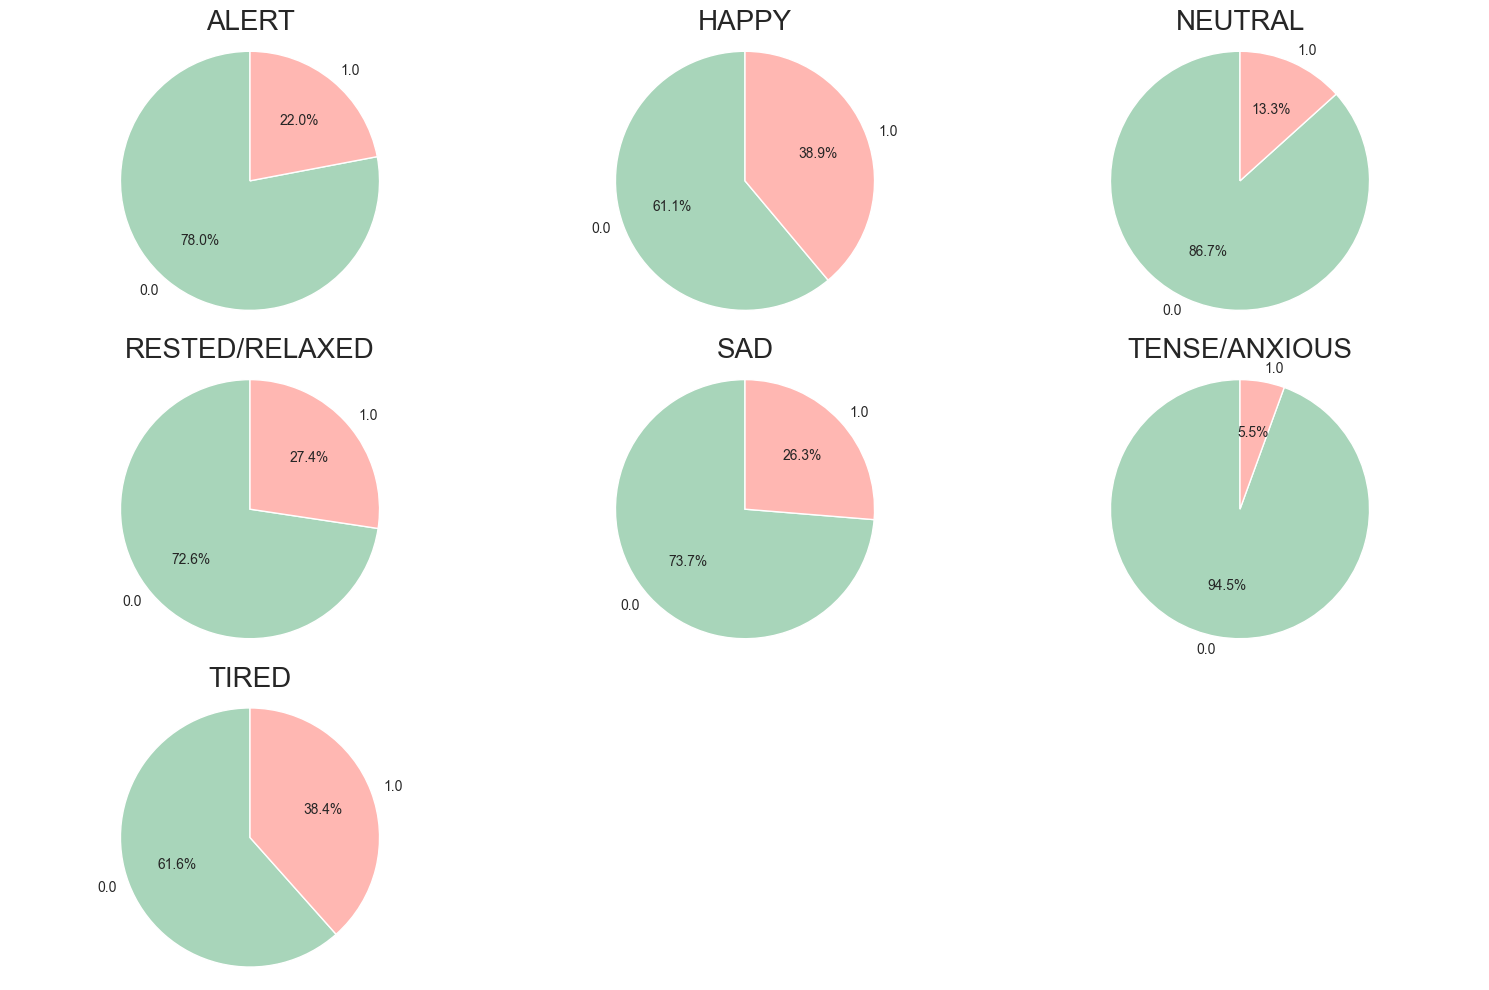

In [933]:
colors = ['#A8D5BA', '#FFB7B2']
# Representem els valors amb gràfiques circulars, principals targets que volem predir i la resta de variables de posibles targets

percents = [
    df_categoric['TENSE/ANXIOUS'].value_counts()/df_categoric.shape[0]*100, # Target principal
    df_categoric['RESTED/RELAXED'].value_counts()/df.shape[0]*100, # Target principal
    df_categoric['ALERT'].value_counts()/df_categoric.shape[0]*100,
    df_categoric['HAPPY'].value_counts()/df_categoric.shape[0]*100,
    df_categoric['NEUTRAL'].value_counts()/df_categoric.shape[0]*100,
    df_categoric['SAD'].value_counts()/df_categoric.shape[0]*100,
    df_categoric['TIRED'].value_counts()/df_categoric.shape[0]*100
]

print('Percentatge de True False de posibles targets:', '\n')
plt.figure(figsize=(15, 10))
for i, (target, percent) in enumerate(zip(target_col, percents)):
    plt.subplot(3, 3, i + 1)
    plt.pie(percent, labels=percent.index, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.axis('equal')
    plt.title(target, size=20)


plt.tight_layout()
plt.show()

Observem que els targets que podem analizar (les categories escrites en majuscules), tenen un true (1) bastant menor al conjunt de dades per tant haurem de fer un SMOTE en preprocessament de dades posterior, balancejar dades per tal de compensar / balancejar totes les dades.

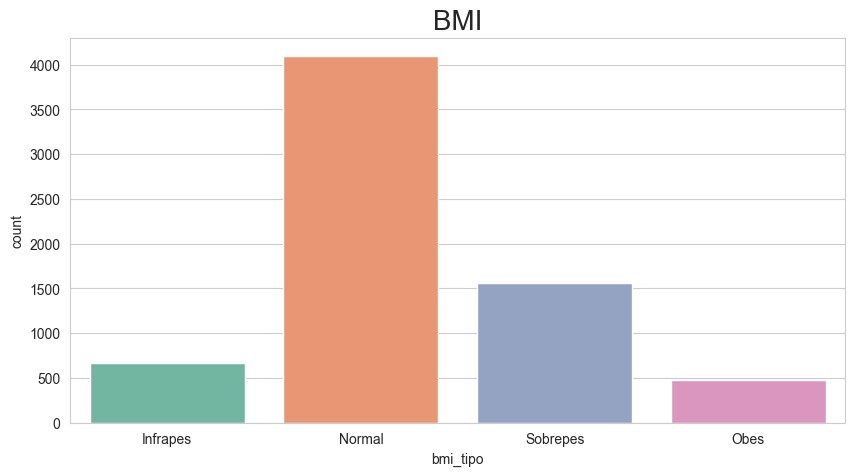

In [934]:
# Visualitzem la resta de variables categòriques, bmi, age i gender
plt.figure(figsize=(10, 5))
sns.countplot(data=df_categoric[['bmi_tipo']], x='bmi_tipo', palette='Set2')
plt.title('BMI', size=20)
plt.show()


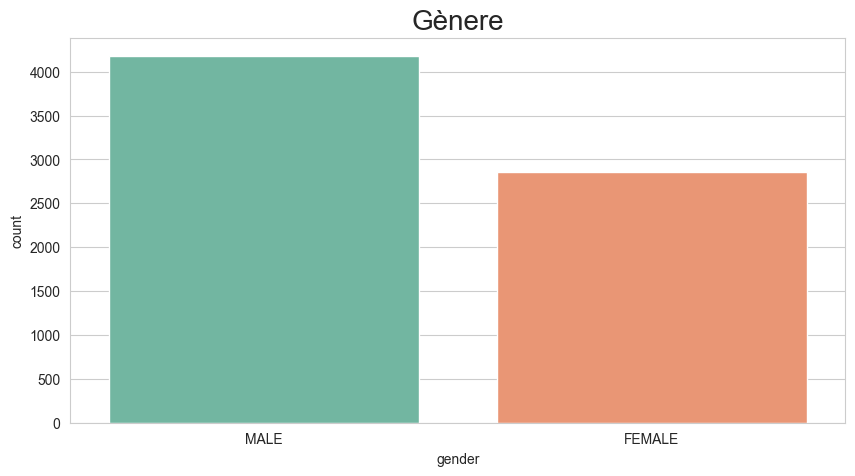

In [935]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_categoric[['gender']], x='gender', palette='Set2')
plt.title('Gènere', size=20)
plt.show()


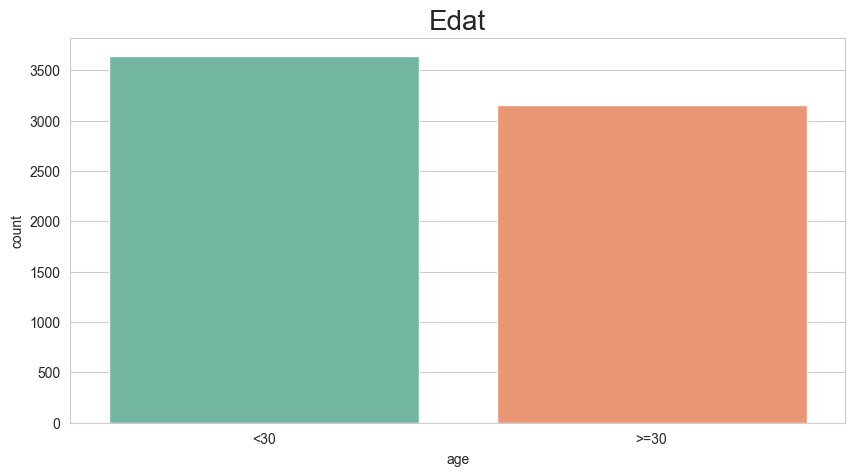

In [936]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_categoric[['age']], x='age', palette='Set2')
plt.title('Edat', size=20)
plt.show()

## Anàlisi Bivariada i Multivariada (Relacions entre Variables)

### Anàlisi Bivariant

#### Numèric vs Numèric

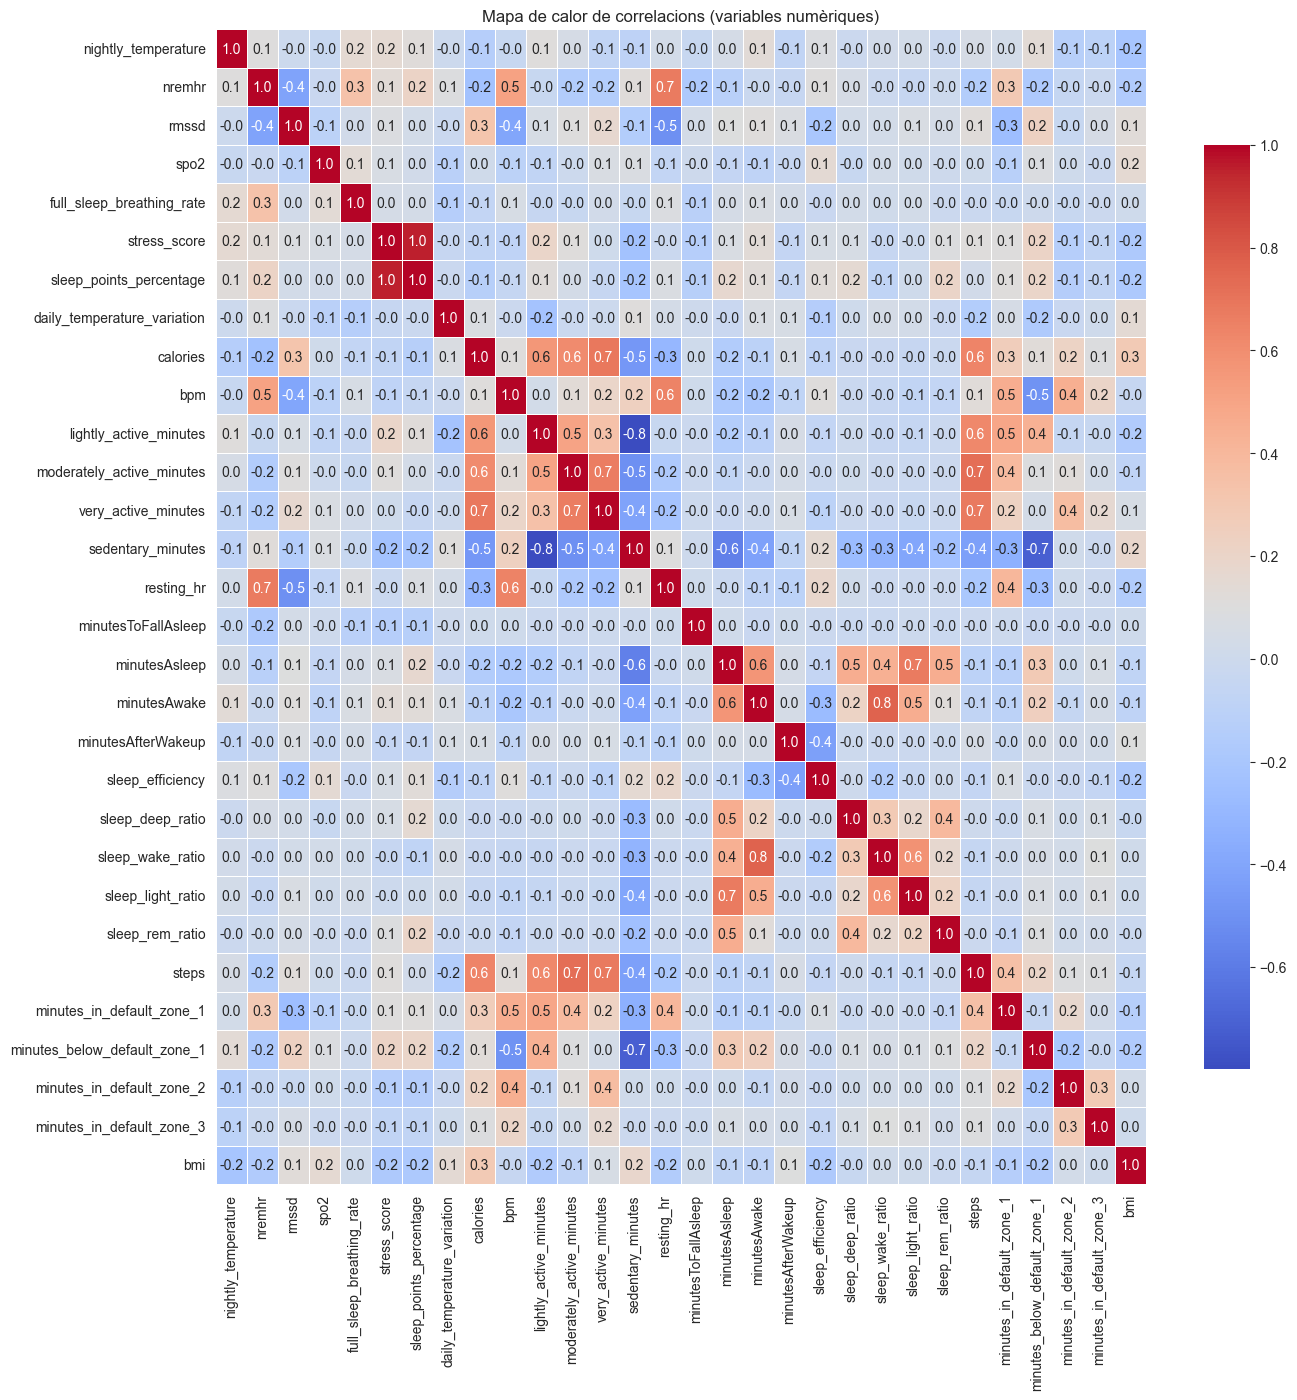

In [937]:
## Numèric vs Numèric: matriu de correlació + scatter de parelles fortes
corr = df[numeric_col].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5, cbar_kws={"shrink": .8})
plt.title("Mapa de calor de correlacions (variables numèriques)")
plt.show()

In [938]:
# Seleccionem les parelles més correlacionades (fortes o dèbils)
# Contarem els valors absoluts superiors a 0.7 de correlació
corr_pairs = corr.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[abs(corr_pairs) > 0.7]
corr_pairs = corr_pairs[corr_pairs != 1] # Eliminem les correlacions amb si mateixes

# Eliminem les correlacions duplicades (A-B i B-A)
corr_pairs = corr_pairs[corr_pairs.index.map(lambda x: x[0] < x[1])]

corr_pairs_count = corr_pairs.count()
print(corr_pairs)
print('\nNombre de variables correlacionades per sobre de 0.7: ', corr_pairs_count)


sleep_points_percentage       stress_score         0.953324
minutesAwake                  sleep_wake_ratio     0.765604
moderately_active_minutes     steps                0.721036
minutes_below_default_zone_1  sedentary_minutes   -0.719419
lightly_active_minutes        sedentary_minutes   -0.798235
dtype: float64

Nombre de variables correlacionades per sobre de 0.7:  5


Com que tenim 10 valors que estan altament correlacionats, els analitzarem

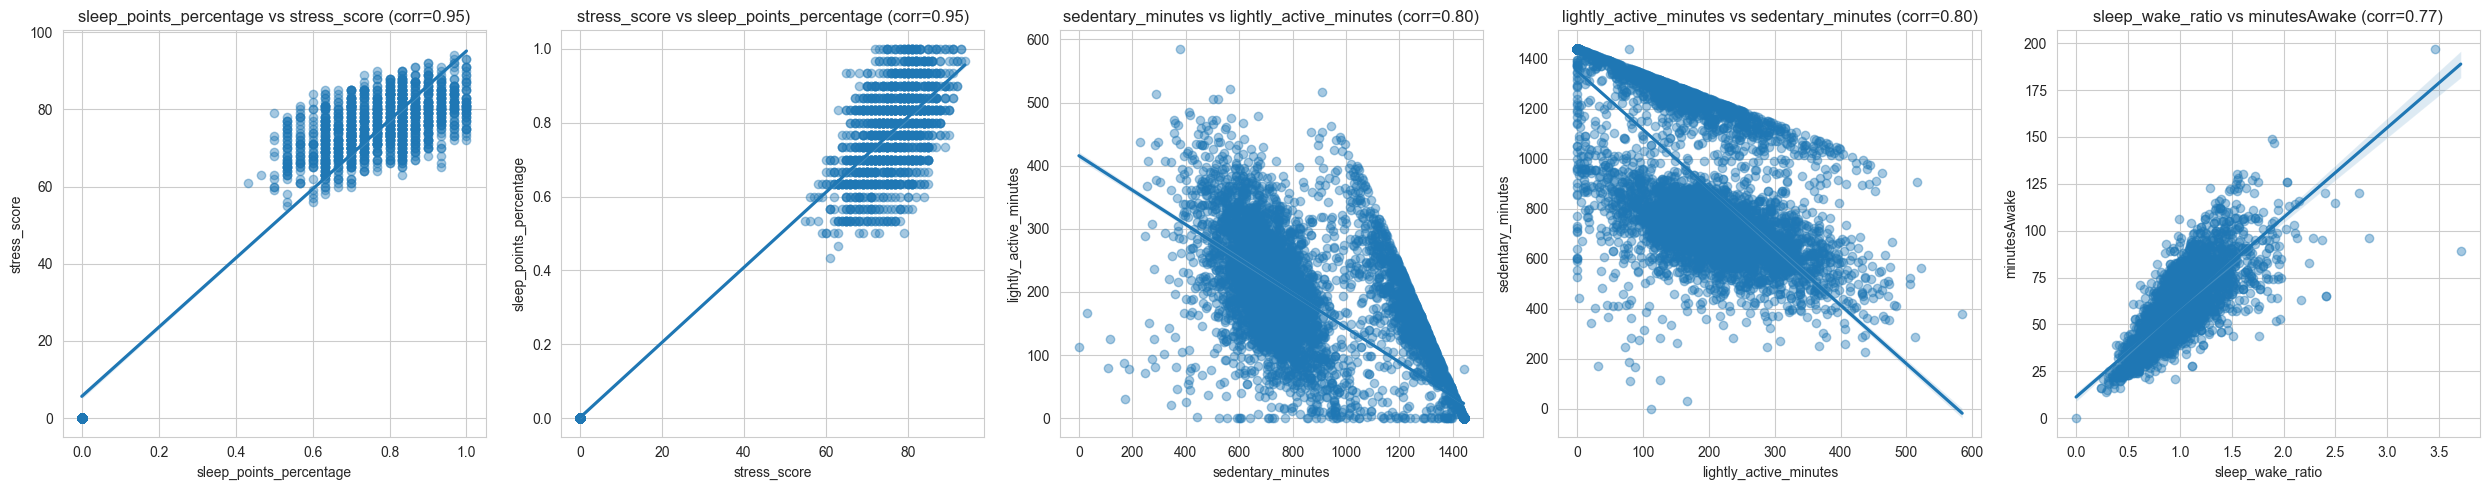

In [939]:

N = 5 # Mostrarem les 10 parelles més correlacionades
corr_pairs = (
    corr.where(~np.eye(corr.shape[0],dtype=bool))
        .stack()
        .abs()
        .sort_values(ascending=False)
        .head(N)
)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.flatten()

for idx, ((var1, var2), val) in enumerate(corr_pairs.items()):
    sns.regplot(x=var1, y=var2, data=df, scatter_kws={'alpha': 0.4}, ax=axes[idx])
    axes[idx].set_title(f'{var1} vs {var2} (corr={val:.2f})')


plt.tight_layout()
plt.show()

#### Numèric vs Categòric

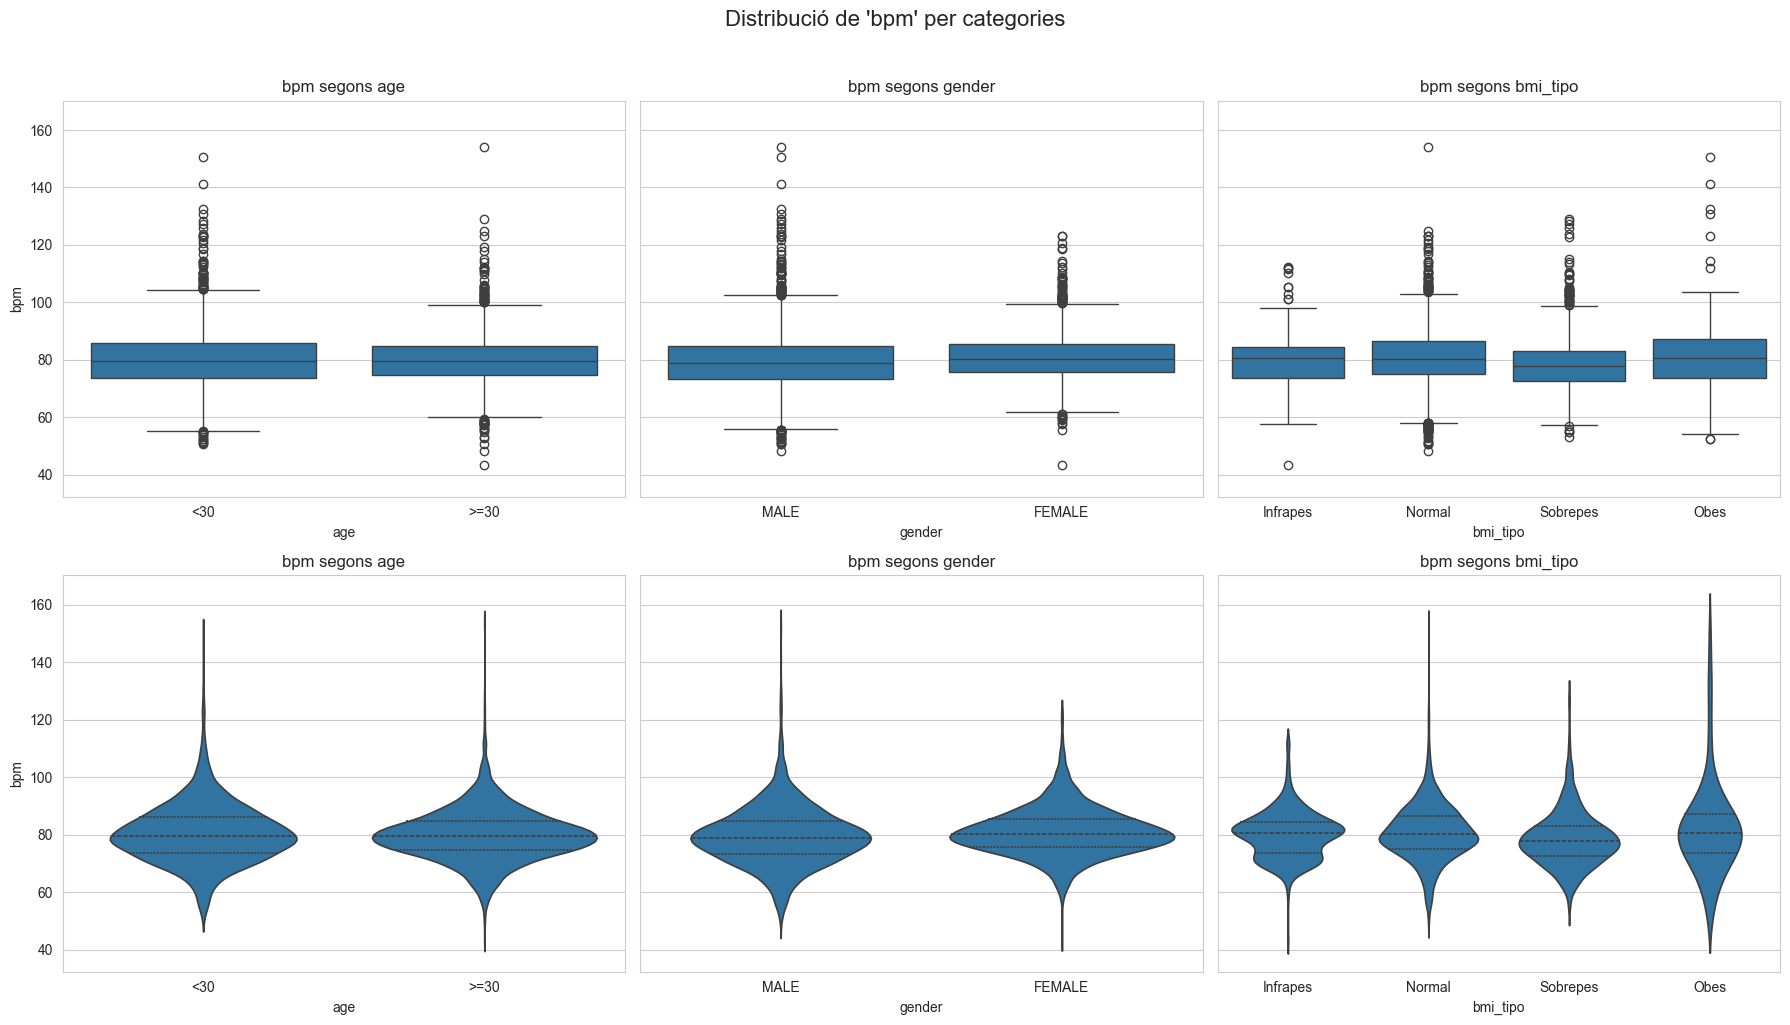

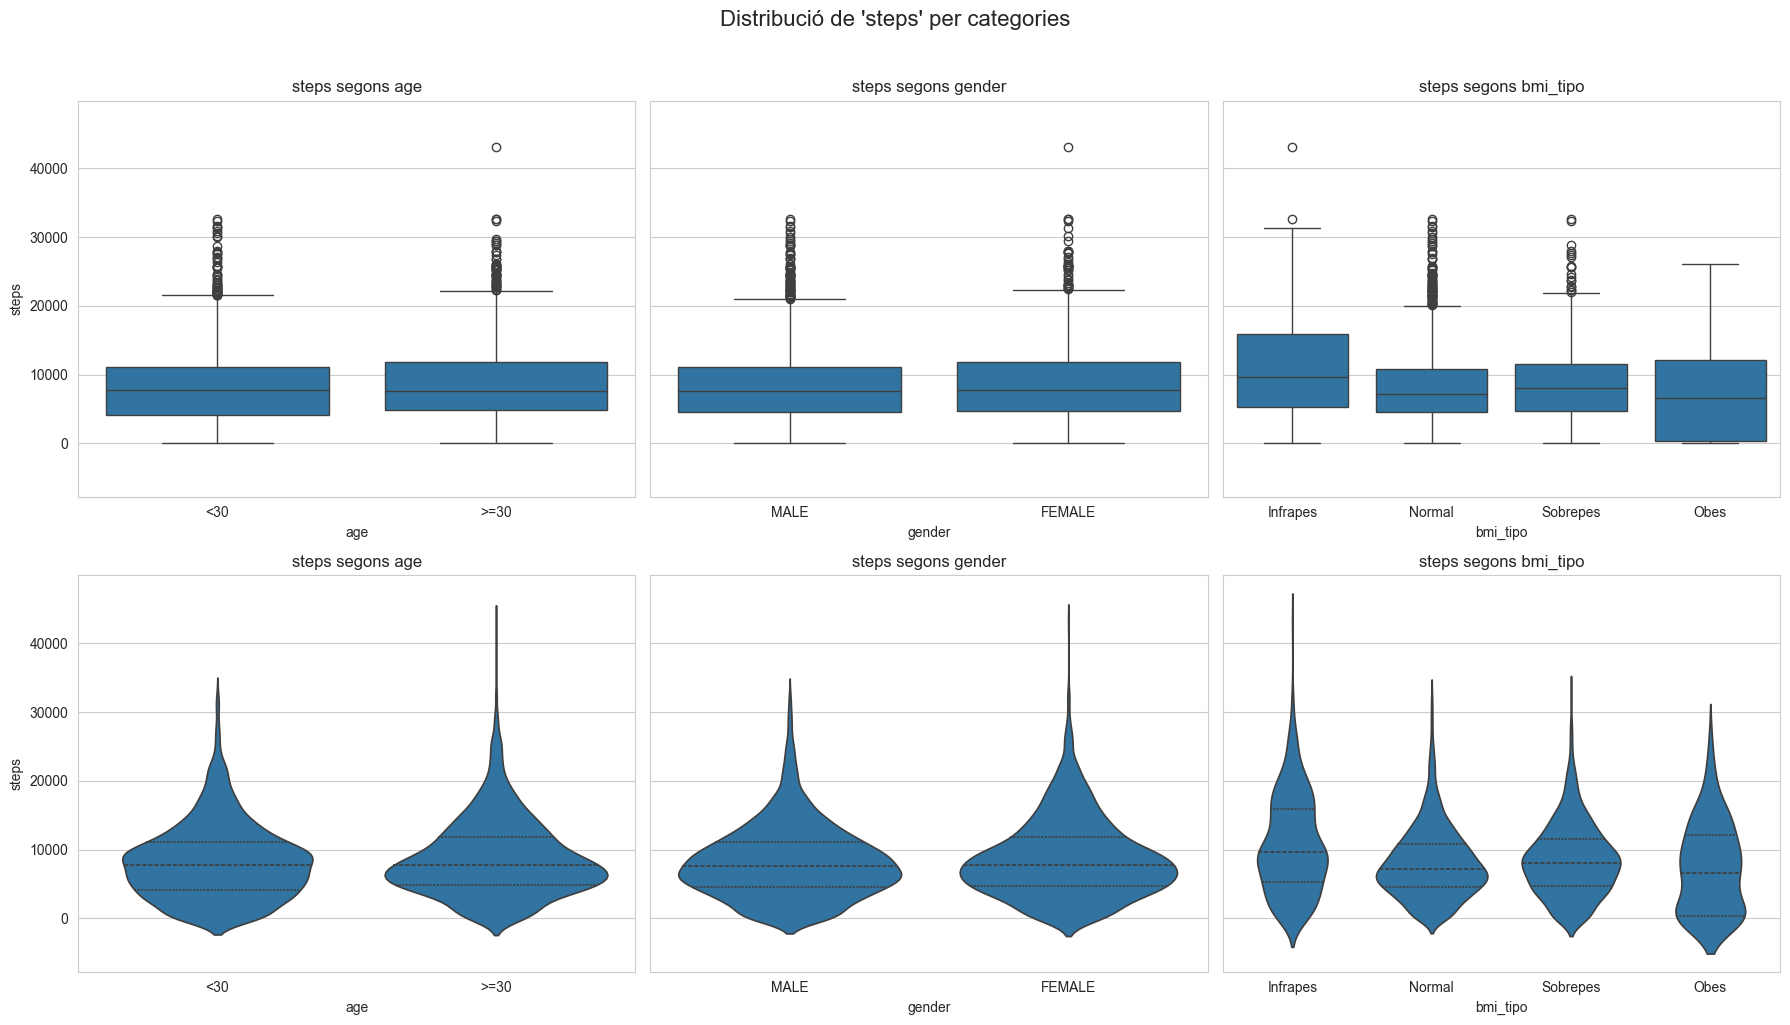

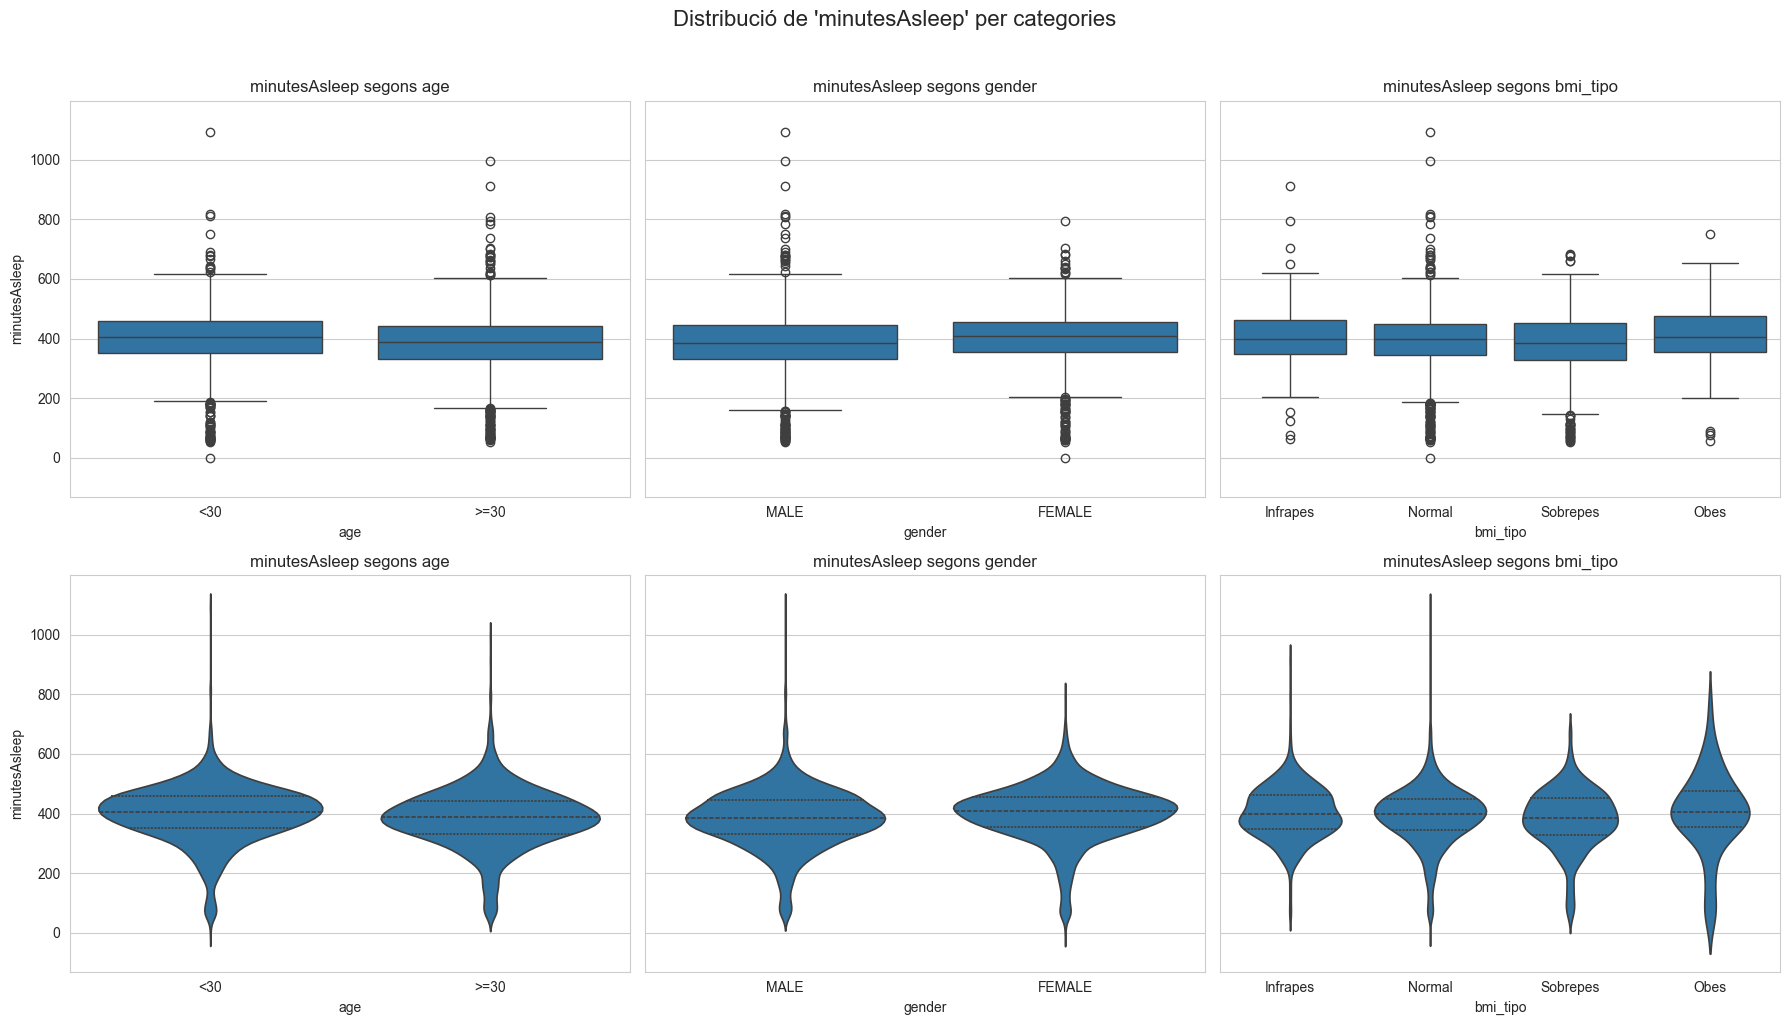

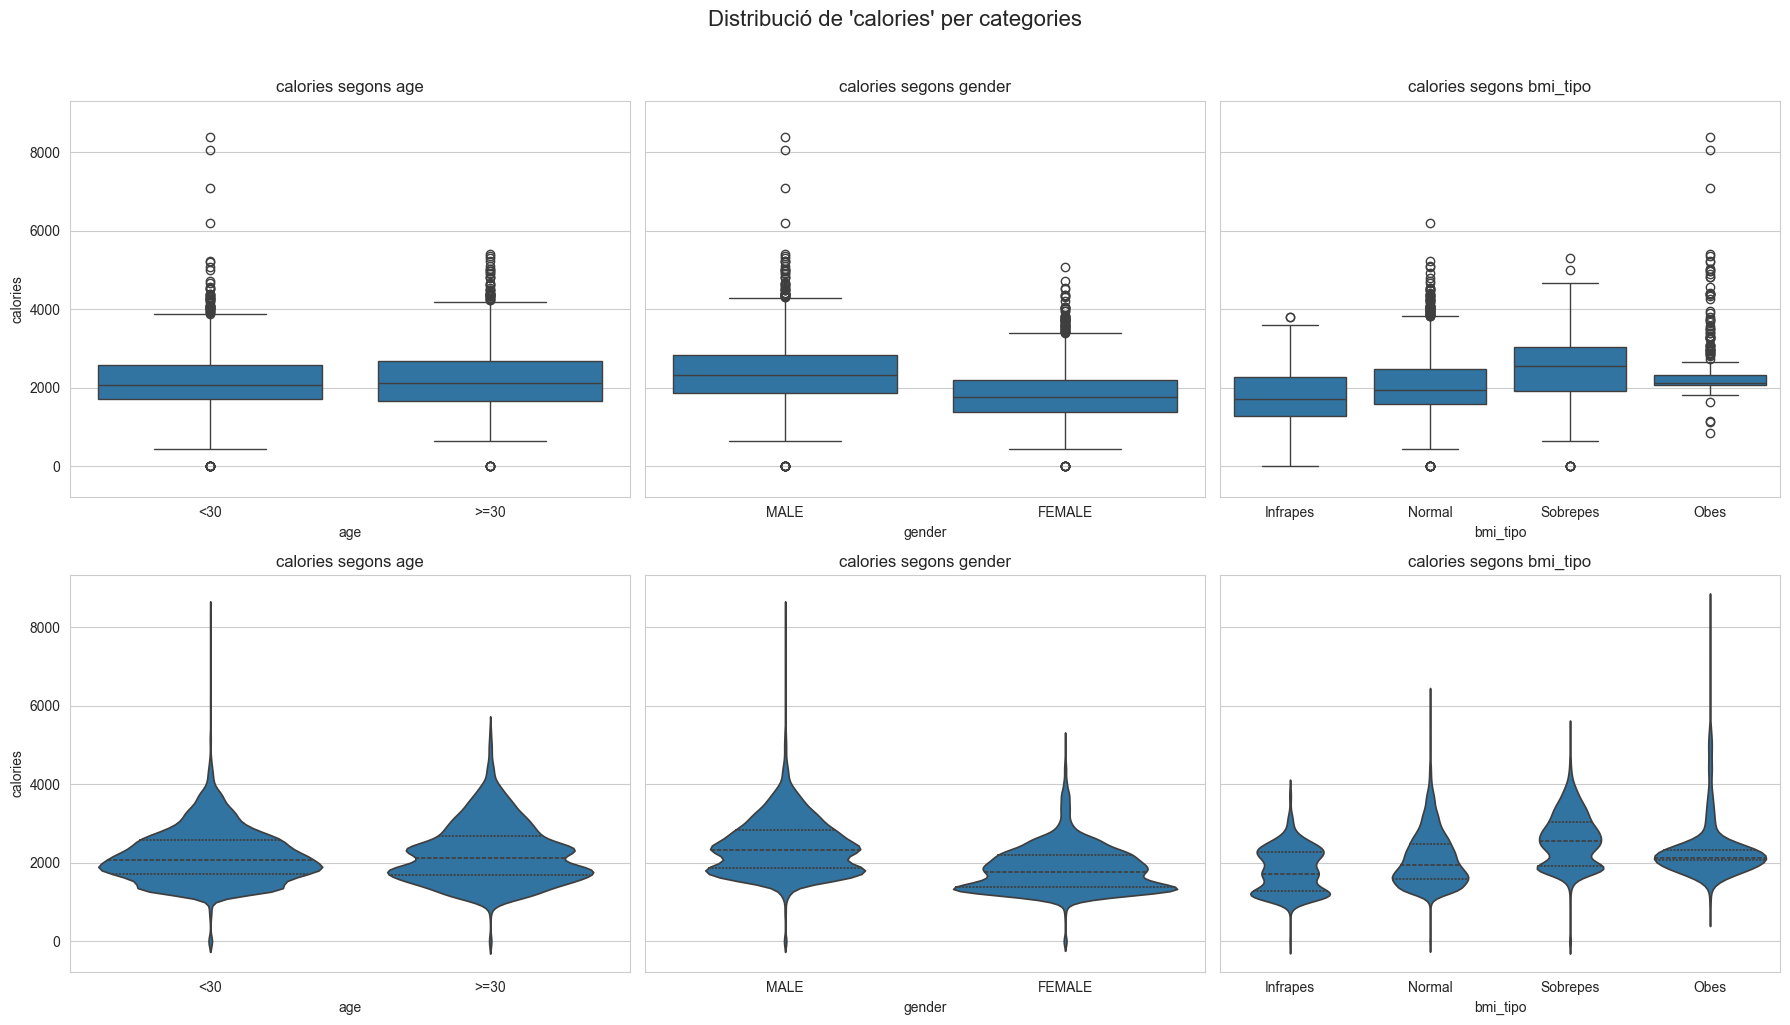

In [940]:
# Numèric vs Categòric: boxplots i violins.
# Les categories que analitzarem seran 'age', 'gender', 'bmi', ja que son les que ens poden aportar més informació.

# Generem el dataset per les variables que voldrem analitzar
categoric_col_2 = ['age', 'gender', 'bmi_tipo']
numeric_col_2 = ['bpm', 'steps', 'minutesAsleep', 'calories']

for num in numeric_col_2:
    # 2 files, tantes columnes com categories
    fig, axes = plt.subplots(2, len(categoric_col_2),
                             figsize=(18, 10),
                             sharey=True)
    
    # Fila 0: boxplots
    for j, cat in enumerate(categoric_col_2):
        sns.boxplot(x=cat, y=num, data=df, ax=axes[0, j])
        axes[0, j].set_title(f"{num} segons {cat}")
        axes[0, j].set_xlabel(cat)
        if j == 0:
            axes[0, j].set_ylabel(num)
        else:
            axes[0, j].set_ylabel("")
    
    # Fila 1: violins
    for j, cat in enumerate(categoric_col_2):
        sns.violinplot(x=cat, y=num, data=df, ax=axes[1, j], inner='quartile')
        axes[1, j].set_title(f"{num} segons {cat}")
        axes[1, j].set_xlabel(cat)
        if j == 0:
            axes[1, j].set_ylabel(num)
        else:
            axes[1, j].set_ylabel("")
    
    # Títol global
    fig.suptitle(f"Distribució de '{num}' per categories", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

### Anàlisi Multivariant

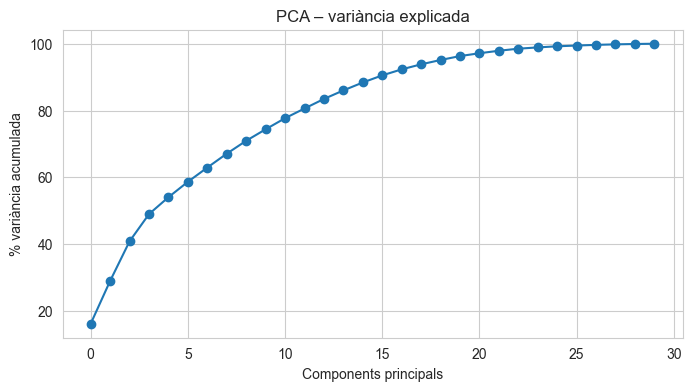

In [941]:
## PCA sobre variables numèriques
X_num = df[numeric_col].dropna() # assegura’t que no hi ha NaNs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variància explicada
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.ylabel('% variància acumulada')
plt.xlabel('Components principals')
plt.title('PCA – variància explicada')
plt.grid(True)
plt.show()

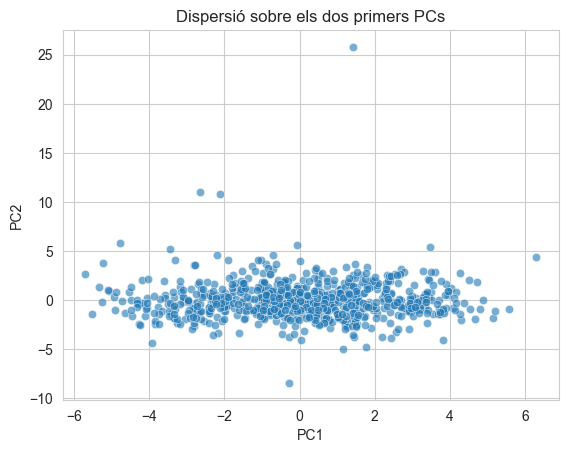

In [942]:
# Primeres dues components amb anotacions opcionals
pca_df = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.6)
plt.title('Dispersió sobre els dos primers PCs')
plt.show()

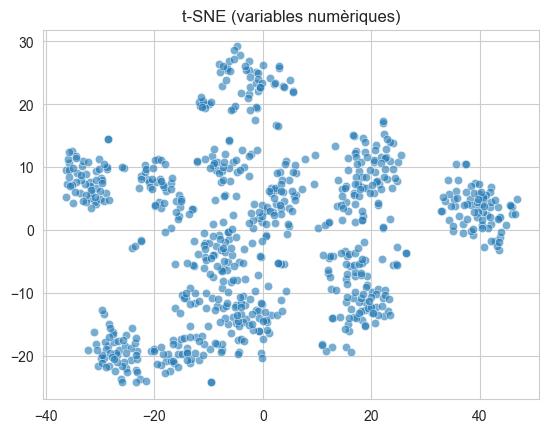

In [943]:
## t-SNE (més no-línia) – pot tardar una mica
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], alpha=0.6)
plt.title('t-SNE (variables numèriques)')
plt.show()

#### Model supervisat ràpid per veure importància de variables

In [950]:
# Ajusta "target_vars" als teus objectius (binàries o contínues)
target_vars = ['TENSE/ANXIOUS', 'RESTED/RELAXED']
df_prova = df.dropna(subset=target_vars).copy()

df_prova.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2290 entries, 1 to 7409
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   date                          2290 non-null   object  
 1   nightly_temperature           1717 non-null   float64 
 2   nremhr                        1179 non-null   float64 
 3   rmssd                         1179 non-null   float64 
 4   spo2                          706 non-null    float64 
 5   full_sleep_breathing_rate     1193 non-null   float64 
 6   stress_score                  1041 non-null   float64 
 7   sleep_points_percentage       1041 non-null   float64 
 8   daily_temperature_variation   1699 non-null   float64 
 9   calories                      2243 non-null   float64 
 10  bpm                           2067 non-null   float64 
 11  lightly_active_minutes        2243 non-null   float64 
 12  moderately_active_minutes     2243 non-null   float64



=========== Avaluant target: 'TENSE/ANXIOUS' ==============

--- Model: NeuralNet ---
              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87       357
         1.0       0.12      0.01      0.02       101

    accuracy                           0.77       458
   macro avg       0.45      0.50      0.44       458
weighted avg       0.63      0.77      0.68       458



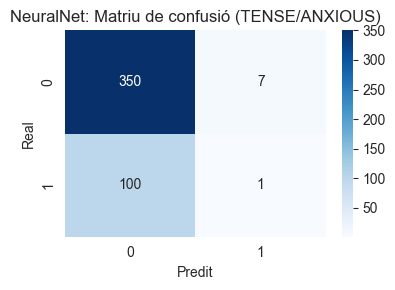

Sensibilitat (recall) classe 1: 0.01

--- Model: SVM ---
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       357
         1.0       0.00      0.00      0.00       101

    accuracy                           0.78       458
   macro avg       0.39      0.50      0.44       458
weighted avg       0.61      0.78      0.68       458



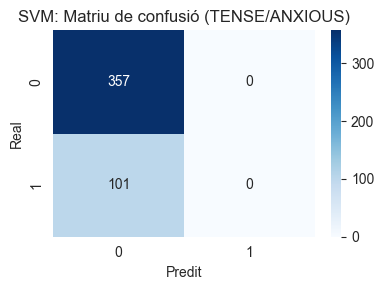

Sensibilitat (recall) classe 1: 0.00

--- Model: RandomForest ---
              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87       357
         1.0       0.50      0.04      0.07       101

    accuracy                           0.78       458
   macro avg       0.64      0.51      0.47       458
weighted avg       0.72      0.78      0.70       458



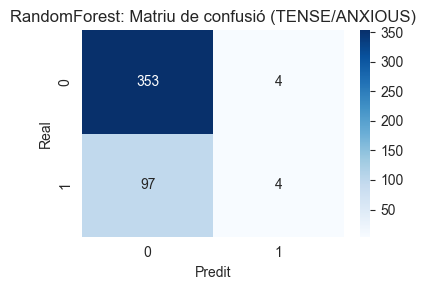

Sensibilitat (recall) classe 1: 0.04

--- Model: GradientBoosting ---
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87       357
         1.0       0.44      0.08      0.13       101

    accuracy                           0.78       458
   macro avg       0.62      0.53      0.50       458
weighted avg       0.71      0.78      0.71       458



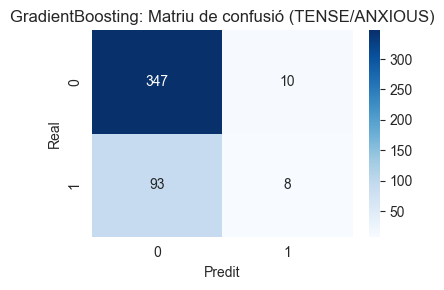

Sensibilitat (recall) classe 1: 0.08


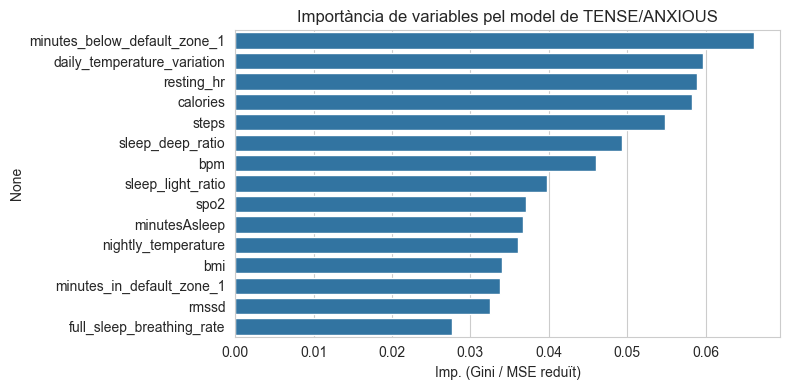



=========== Avaluant target: 'RESTED/RELAXED' ==============

--- Model: NeuralNet ---
              precision    recall  f1-score   support

         0.0       0.69      0.64      0.67       280
         1.0       0.49      0.54      0.52       178

    accuracy                           0.60       458
   macro avg       0.59      0.59      0.59       458
weighted avg       0.61      0.60      0.61       458



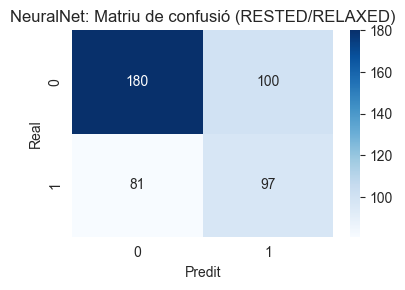

Sensibilitat (recall) classe 1: 0.54

--- Model: SVM ---
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       280
         1.0       0.00      0.00      0.00       178

    accuracy                           0.61       458
   macro avg       0.31      0.50      0.38       458
weighted avg       0.37      0.61      0.46       458



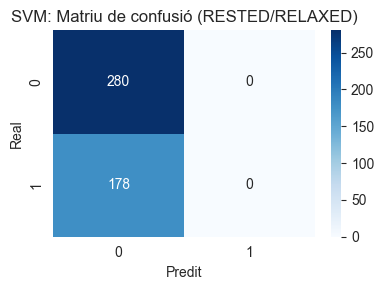

Sensibilitat (recall) classe 1: 0.00

--- Model: RandomForest ---
              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76       280
         1.0       0.62      0.50      0.55       178

    accuracy                           0.69       458
   macro avg       0.67      0.65      0.66       458
weighted avg       0.68      0.69      0.68       458



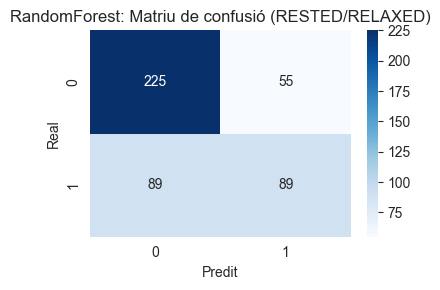

Sensibilitat (recall) classe 1: 0.50

--- Model: GradientBoosting ---
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74       280
         1.0       0.59      0.52      0.56       178

    accuracy                           0.67       458
   macro avg       0.65      0.65      0.65       458
weighted avg       0.67      0.67      0.67       458



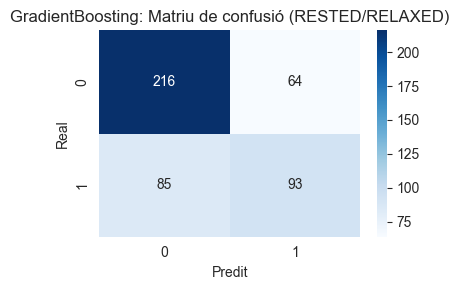

Sensibilitat (recall) classe 1: 0.52


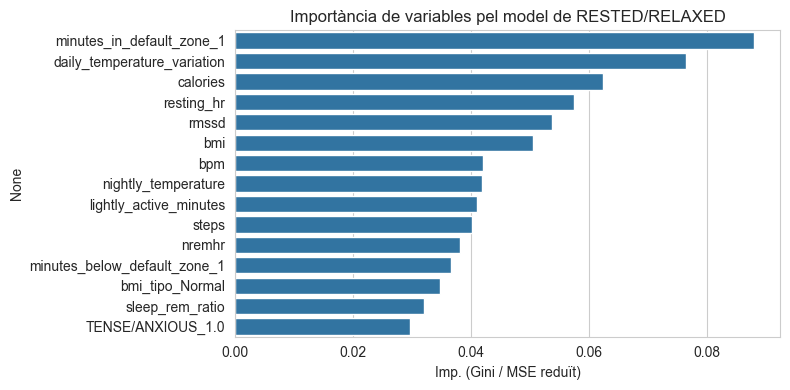

In [ ]:


# 1) Defineix models
models = {
    "NeuralNet":       MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=0),
    "SVM":             SVC(kernel='rbf', probability=True, random_state=0),
    "RandomForest":    RandomForestClassifier(n_estimators=200, random_state=0),
    "GradientBoosting":GradientBoostingClassifier(n_estimators=200, random_state=0)
}

# 2) Loop per cada target
for target in target_vars:
    print(f"\n\n=========== Avaluant target: '{target}' ==============")
    
    # 2.1 Prepara dades i one-hot
    df_t = df.dropna(subset=[target, 'date']).copy()
    X = df_t.drop(columns=[target, 'date', 'ALERT', 'HAPPY', 'NEUTRAL', 'SAD', 'TIRED'])
    y = df_t[target].values
    X_enc = pd.get_dummies(X, drop_first=True)
    
    # 2.2 Imputació: substituir NaN per la mitjana de la columna
    imputer = SimpleImputer(strategy='mean')
    X_imp = pd.DataFrame(imputer.fit_transform(X_enc), columns=X_enc.columns)
    
    # 2.3 Split train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_imp, y, test_size=0.2, stratify=y, random_state=0
    )
    
    # 2.4 Entrena i avalua cada model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print(f"\n--- Model: {name} ---")
        # Classification report
        print(classification_report(y_test, y_pred))
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4,3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name}: Matriu de confusió ({target})')
        plt.xlabel('Predit')
        plt.ylabel('Real')
        plt.tight_layout()
        plt.show()
        
        # Sensibilitat (recall) classe positiva = 1
        sens = recall_score(y_test, y_pred, pos_label=1)
        print(f"Sensibilitat (recall) classe 1: {sens:.2f}")

    # 7) Importància de variables
    imp = pd.Series(model.feature_importances_, index=X_enc.columns) \
            .sort_values(ascending=False).head(15)
    plt.figure(figsize=(8,4))
    sns.barplot(x=imp.values, y=imp.index)
    plt.title(f'Importància de variables pel model de {target}')
    plt.xlabel('Imp. (Gini / MSE reduït)')
    plt.tight_layout()
    plt.show()
    print('======================================================')